In [9]:
from astropy.io import fits
from astropy.timeseries import LombScargle
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from sklearn.metrics import mean_squared_error
import pywt
from scipy.optimize import leastsq
import pandas as pd
import lmfit
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib import gridspec
from pylab import rc

In [2]:
lc = lk.search_lightcurvefile('GD356', sector=16).download().PDCSAP_FLUX.remove_nans()

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [3]:
sec16 = lc.flux
sec16t = lc.time

In [4]:
lc = lk.search_lightcurvefile('GD356', sector=23).download().PDCSAP_FLUX.remove_nans()
sec23 = lc.flux
sec23t = lc.time
lc = lk.search_lightcurvefile('GD356', sector=24).download().PDCSAP_FLUX.remove_nans()
sec24 = lc.flux
sec24t = lc.time
lc = lk.search_lightcurvefile('GD356', sector=25).download().PDCSAP_FLUX.remove_nans()
sec25 = lc.flux
sec25t = lc.time
lc = lk.search_lightcurvefile('GD356', sector=26).download().PDCSAP_FLUX.remove_nans()
sec26 = lc.flux
sec26t = lc.time

In [5]:
sec16 = (sec16/np.mean(sec16))-1
sec23 = (sec23/np.mean(sec23))-1
sec24 = (sec24/np.mean(sec24))-1
sec25 = (sec25/np.mean(sec25))-1
sec26 = (sec26/np.mean(sec26))-1

In [16]:
len(sec26)/150
#sec 16 - 112

#sec 23first - 48
#sec 23second - 50
#sec24 106
#sec 25 115
#sec 26 113

112.94666666666667

In [9]:
sec23first = sec23[:7337]
sec23firstT = sec23t[:7337]

sec23second = sec23[7337:]
sec23secondT = sec23t[7337:]

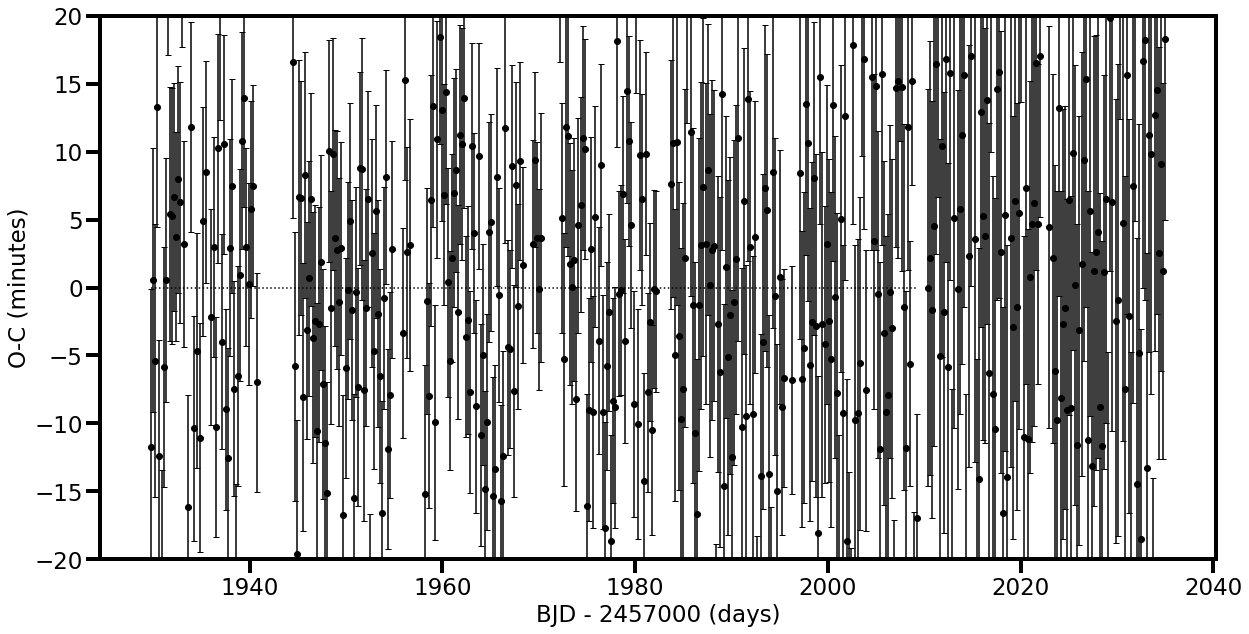

0.3547867818407382


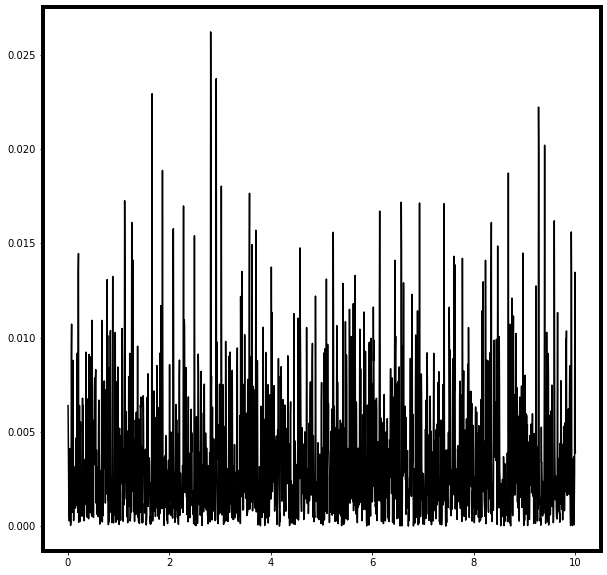

In [24]:
from pylab import rc
rc('axes', linewidth=4)

tmp16, tmpt16, error16 = sineFitLevenbergMarquardt(sec16t, sec16,112)
meanline = 0.08029870*24*60*(np.mean(tmp16)-1.5031844728888097)/(2*np.pi)

toplot16 = 0.08029870*24*60*(np.array(tmp16)-1.5031844728888097)/(2*np.pi)
toerr16 = 0.08029870*24*60*(np.array(error16))/(2*np.pi)


tmp23a, tmpt23a, error23a = sineFitLevenbergMarquardt(sec23firstT, sec23first, 48)
plt.figure(figsize=(20,10))
meanline = 0.08029870*24*60*(np.mean(tmp23a)-1.5031844728888097)/(2*np.pi)

toplot23a = 0.08029870*24*60*(np.array(tmp23a)-1.5031844728888097)/(2*np.pi)
toerr23a = 0.08029870*24*60*(np.array(error23a))/(2*np.pi)



tmp23b, tmpt23b, error23b = sineFitLevenbergMarquardt(sec23secondT, sec23second, 50)
toplot23b = 0.08029870*24*60*(np.array(tmp23b)-1.5031844728888097)/(2*np.pi)
toerr23b = 0.08029870*24*60*(np.array(error23b))/(2*np.pi)


tmp24, tmpt24, error24 = sineFitLevenbergMarquardt(sec24t, sec24, 106)
toplot24 = 0.08029870*24*60*(np.array(tmp24)-1.5031844728888097)/(2*np.pi)
toerr24 = 0.08029870*24*60*(np.array(error24))/(2*np.pi)


tmp25, tmpt25, error25 = sineFitLevenbergMarquardt(sec25t, sec25, 115)
toplot25 = 0.08029870*24*60*(np.array(tmp25)-1.5031844728888097)/(2*np.pi)
toerr25 = 0.08029870*24*60*(np.array(error25))/(2*np.pi)

tmp26, tmpt26, error26 = sineFitLevenbergMarquardt(sec26t, sec26, 113)
toplot26 = 0.08029870*24*60*(np.array(tmp26)-1.5031844728888097)/(2*np.pi)
toerr26 = 0.08029870*24*60*(np.array(error26))/(2*np.pi)



plt.plot([tmpt23a[0], tmpt25[-1]], [0,0], ':k')
plt.errorbar(tmpt23a, toplot23a, yerr=toerr23a, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.errorbar(tmpt23b, toplot23b, yerr=toerr23b, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.errorbar(tmpt24, toplot24, yerr=toerr24, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.errorbar(tmpt25, toplot25, yerr=toerr25, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.errorbar(tmpt26, toplot26, yerr=toerr26, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.ylim(-20,20)
plt.ylabel('O-C (minutes)',fontsize=23)
plt.xlabel('BJD - 2457000 (days)',fontsize=23)
plt.tick_params(which='both', width=4)
plt.tick_params(which='major', length=14)
plt.tick_params(labelsize=23)
#plt.savefig('O-C16_100.pdf')
plt.show()


allTimes = np.append(tmpt16, tmpt23a)
allTimes = np.append(allTimes, tmpt23b)
allTimes = np.append(allTimes, tmpt24)
allTimes = np.append(allTimes, tmpt25)
allTimes = np.append(allTimes, tmpt26)

allPhases = np.append(toplot16, toplot23a)
allPhases = np.append(allPhases, toplot23b)
allPhases = np.append(allPhases, toplot24)
allPhases = np.append(allPhases, toplot25)
allPhases = np.append(allPhases, toplot26)

allErr = np.append(toerr23a, toerr23b)
allErr = np.append(allErr, toerr24)
allErr = np.append(allErr, toerr25)
allErr = np.append(allErr, toerr26)


freq = np.linspace(0.01,10,int(10000/5))
powerPl = LombScargle(allTimes,allPhases).power(freq)
plt.figure(figsize=(10,10))
plt.plot(freq,powerPl, c='k')
print(1/freq[np.argmax(powerPl)])
np.savetxt('TESS5hour.dat', dat, delimiter = '\t')

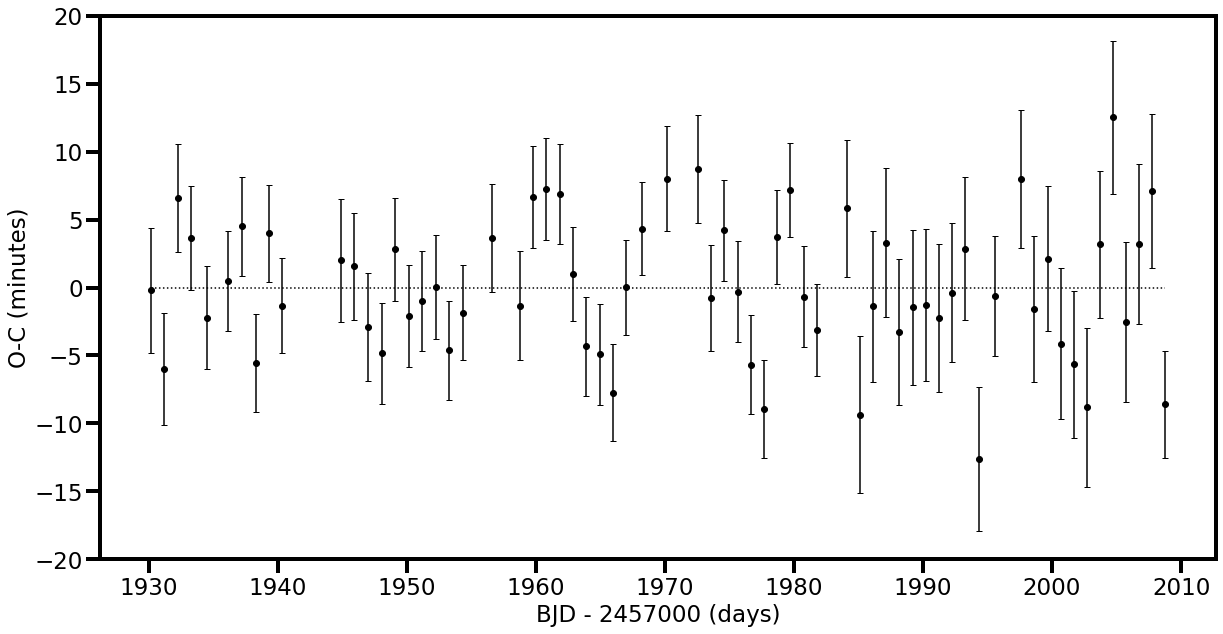

In [32]:
from pylab import rc
rc('axes', linewidth=4)
tmp23a, tmpt23a, error23a = sineFitLevenbergMarquardt(sec23firstT, sec23first, 10)
plt.figure(figsize=(20,10))
meanline = 0.08029870*24*60*(np.mean(tmp23a)-1.5031844728888097)/(2*np.pi)

toplot23a = 0.08029870*24*60*(np.array(tmp23a)-1.5031844728888097)/(2*np.pi)
toerr23a = 0.08029870*24*60*(np.array(error23a))/(2*np.pi)



tmp23b, tmpt23b, error23b = sineFitLevenbergMarquardt(sec23secondT, sec23second, 10)
toplot23b = 0.08029870*24*60*(np.array(tmp23b)-1.5031844728888097)/(2*np.pi)
toerr23b = 0.08029870*24*60*(np.array(error23b))/(2*np.pi)


tmp24, tmpt24, error24 = sineFitLevenbergMarquardt(sec24t, sec24, 22)
toplot24 = 0.08029870*24*60*(np.array(tmp24)-1.5031844728888097)/(2*np.pi)
toerr24 = 0.08029870*24*60*(np.array(error24))/(2*np.pi)


tmp25, tmpt25, error25 = sineFitLevenbergMarquardt(sec25t, sec25, 24)
toplot25 = 0.08029870*24*60*(np.array(tmp25)-1.5031844728888097)/(2*np.pi)
toerr25 = 0.08029870*24*60*(np.array(error25))/(2*np.pi)



plt.plot([tmpt23a[0], tmpt25[-1]], [0,0], ':k')
plt.errorbar(tmpt23a, toplot23a, yerr=toerr23a, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.errorbar(tmpt23b, toplot23b, yerr=toerr23b, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.errorbar(tmpt24, toplot24, yerr=toerr24, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.errorbar(tmpt25, toplot25, yerr=toerr25, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.ylim(-20,20)
plt.ylabel('O-C (minutes)',fontsize=23)
plt.xlabel('BJD - 2457000 (days)',fontsize=23)
plt.tick_params(which='both', width=4)
plt.tick_params(which='major', length=14)
plt.tick_params(labelsize=23)
#plt.savefig('O-C16_100.pdf')
plt.show()


allTimes = np.append(tmpt23a, tmpt23b)
allTimes = np.append(allTimes, tmpt24)
allTimes = np.append(allTimes, tmpt25)

allPhases = np.append(toplot23a,toplot23b)
allPhases = np.append(allPhases, toplot24)
allPhases = np.append(allPhases, toplot25)

allErr = np.append(toerr23a, toerr23b)
allErr = np.append(allErr, toerr24)
allErr = np.append(allErr, toerr25)


dat = np.array([allTimes, allPhases,allErr])

dat = dat.T

#np.savetxt('TESSJJTry.dat', dat, delimiter = '\t')

In [6]:
print(len(sec16))
print(len(sec23))
print(len(sec24))
print(len(sec25))
print(len(sec26))

16812
14851
16045
17246
16942


In [26]:
sec25t[-1]+2457000

2459009.306502743

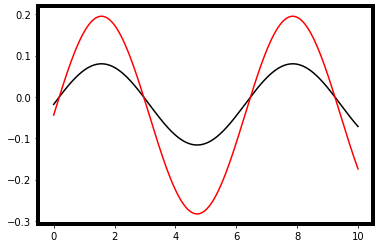

In [35]:
xdummy = np.linspace(0,10,1000)
y1 = ((np.sin(xdummy)+10)/np.mean(y1))-1
y2 = ((2*np.sin(xdummy)+8)/np.mean(y2))-1
plt.plot(xdummy, y1,c='k')
plt.plot(xdummy, y2, c='r')

In [47]:

dataLT = pd.read_csv('mes2.csv', delimiter=',')
timeLT = dataLT['BJD_TDB']-2457000
revFluxLT = dataLT['rel_flux_T1']
revFluxLT = (revFluxLT/np.mean(revFluxLT))-1


dataLT2 = pd.read_csv('LT/2/Measurements.xls', delimiter='\t')
timeLT2 = dataLT2['BJD_TDB']-2457000
revFluxLT2 = dataLT2['rel_flux_T1']
revFluxLT2 = (revFluxLT2/np.mean(revFluxLT2))-1

dataLT3 = pd.read_csv('LT/3/Measurements031020.xls', delimiter='\t')
timeLT3 = dataLT3['JD_UTC']-2457000
revFluxLT3 = dataLT3['rel_flux_T1']
revFluxLT3= (revFluxLT3/np.mean(revFluxLT3))-1

dataLT4 = pd.read_csv('LT/4/aligned/Measurements.xls', delimiter='\t')
timeLT4 = dataLT4['JD_UTC']-2457000
revFluxLT4 = dataLT4['rel_flux_T1']
revFluxLT4 = (revFluxLT4/np.mean(revFluxLT4))-1

In [6]:
def foldMeth(timeArray, period):
    phases = []
    for el in timeArray:
        passed = int(el/period)
        leftover = el - (passed*period)
        phase = leftover/period
        phases.append(phase)
    return np.array(phases)

In [281]:
allLTFlux = np.append(revFluxLT,revFluxLT2)
allLTFlux = np.append(allLTFlux, revFluxLT3)
#allLTFlux = np.append(allLTFlux, revFluxLT4)
allLTTime = np.append(timeLT,timeLT2)
allLTTime = np.append(allLTTime, timeLT3)
#allLTTime = np.append(allLTTime, timeLT4)

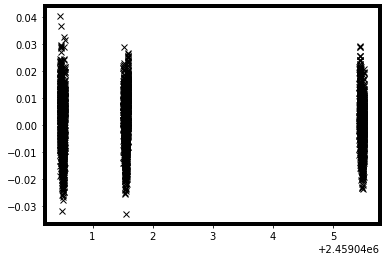

In [282]:
phasesLT = foldMeth(allLTTime, 0.08029870250017346)

In [ ]:
amplitudes = np.linspace(0,0.02, 1000)
mindif=100
for i in range(1000):
    amp = amplitudes[i]
    somesine = amp*np.sin(fullWHTSTackT*(2*np.pi/0.0803)+4.1510533560946214)
    difference = np.sum(np.abs(fullWHTSTackF-somesine))
    if difference < mindif:
        mindif = difference
        mostlikelyamp = amp
print(mostlikelyamp)

In [287]:
amplitudes = np.linspace(0,0.02, 10000)
#phases = np.linspace(0,2*np.pi,10000)
mindif=100
for i in range(10000):
    amp = amplitudes[i]
    #phase=phases[i]
    somesine = amp*np.sin(allLTTime*(2*np.pi/0.08029870250017346)+2.8396554058550407)
    difference = np.sum(np.abs(allLTFlux-somesine))
    if difference < mindif:
        mindif = difference
        mostlikelyamp = amp
print(mostlikelyamp)

0.007732773277327733


In [7]:
def sineFit(time, flux, Nslices):
    bestPhases = []
    timeMean = []
    phaseSTD = []
    phases = np.linspace(0, 2*np.pi, 1000)
    chunksF = np.array_split(np.array(flux),Nslices)
    chunksT = np.array_split(np.array(time),Nslices)
    for i in range(Nslices):
        minMSE = 9999999  
        for phase in phases:
            model = 0.006446446446446446*np.sin(chunksT[i]*(2*np.pi/0.08029870152418028)+phase)
            mse = mean_squared_error(model, chunksF[i])
            if mse < minMSE:
                minMSE = mse
                bestFitPhase = phase
        bestPhases.append(bestFitPhase)
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)
        thisUncert = np.sqrt(2/len(chunksF[i]))*(np.std(chunksF[i])/0.006446446446446446)
        phaseSTD.append(thisUncert)
    return bestPhases, timeMean,phaseSTD


def sineFitLevenbergMarquardt(time, flux, Nslices):
    bestPhases = []
    timeMean = []
    phaseSTD = []
    phases = np.linspace(0, 2*np.pi, 1000)
    chunksF = np.array_split(np.array(flux),Nslices)
    chunksT = np.array_split(np.array(time),Nslices)
    for i in range(Nslices):
        def model(time, phase):
            return 0.006446446446446446*np.sin(time*(2*np.pi/0.08029870152418028)+phase)
        x0 = 0
        def residuals(phase, flux, time):
            return flux - model(time, phase)
        x, flag = leastsq(residuals, x0, args=(chunksF[i], chunksT[i]))

        bestPhases.append(x[0])
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)
        thisUncert = np.sqrt(2/len(chunksF[i]))*(np.std(chunksF[i])/0.006446446446446446)
        phaseSTD.append(thisUncert)
    return bestPhases, timeMean,phaseSTD


def sineFitLevenbergMarquardtLT(time, flux, Nslices):
    bestPhases = []
    timeMean = []
    phaseSTD = []
    phases = np.linspace(0, 2*np.pi, 10000)
    chunksF = np.array_split(np.array(flux),Nslices)
    chunksT = np.array_split(np.array(time),Nslices)
    for i in range(Nslices):
        def model(time, phase):
            return 0.007732773277327733*np.sin(time*(2*np.pi/0.08029870152418028)+phase)
        x0 = 0
        def residuals(phase, flux, time):
            return flux - model(time, phase)
        x, flag = leastsq(residuals, x0, args=(chunksF[i], chunksT[i]))

        bestPhases.append(x[0])
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)
        thisUncert = np.sqrt(2/len(chunksF[i]))*(np.std(chunksF[i])/0.007732773277327733)
        phaseSTD.append(thisUncert)
    return bestPhases, timeMean,phaseSTD


def sineFitLT(time, flux, Nslices):
    bestPhases = []
    timeMean = []
    phaseSTD = []
    phases = np.linspace(0, 2*np.pi, 1000)
    chunksF = np.array_split(np.array(flux),Nslices)
    chunksT = np.array_split(np.array(time),Nslices)
    for i in range(Nslices):
        minMSE = 9999999  
        for phase in phases:
            model = 0.007732773277327733*np.sin(chunksT[i]*(2*np.pi/0.08029870152418028)+phase)
            mse = mean_squared_error(model, chunksF[i])
            if mse < minMSE:
                minMSE = mse
                bestFitPhase = phase
        bestPhases.append(bestFitPhase)
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)
        thisUncert = np.sqrt(2/len(chunksF[i]))*(np.std(chunksF[i])/0.007732773277327733)
        phaseSTD.append(thisUncert)
    return bestPhases, timeMean,phaseSTD



def sineFitLevenbergMarquardtAmp(time, flux, Nslices):
    bestAmps = []
    timeMean = []
    chunksF = np.array_split(np.array(flux),Nslices)
    chunksT = np.array_split(np.array(time),Nslices)
    for i in range(Nslices):
        def model(time, thisamp):
            return thisamp*np.sin(time*(2*np.pi/0.08029870152418028)+1.5031844728888097)
        x0 = 0.006
        def residuals(thisamp, flux, time):
            return flux - model(time, thisamp)
        x, flag = leastsq(residuals, x0, args=(chunksF[i], chunksT[i]))
        bestAmps.append(x[0])
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)

    return bestAmps, timeMean

def foldMeth(timeArray, period):
    phases = []
    for el in timeArray:
        passed = int(el/period)
        leftover = el - (passed*period)
        phase = leftover/period
        phases.append(phase)
    return np.array(phases)


def sineFitLevenbergMarquardtLTAmp(time, flux, Nslices):
    bestAmps = []
    timeMean = []
    chunksF = np.array_split(np.array(flux),Nslices)
    chunksT = np.array_split(np.array(time),Nslices)
    for i in range(Nslices):
        def model(time, thisamp):
            return thisamp*np.sin(time*(2*np.pi/0.08029870152418028)+1.5031844728888097)
        x0 = 0.0077
        def residuals(thisamp, flux, time):
            return flux - model(time, thisamp)
        x, flag = leastsq(residuals, x0, args=(chunksF[i], chunksT[i]))

        bestAmps.append(x[0])
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)
        
    return bestAmps, timeMean

In [338]:
(0.67/(2*np.pi)) -(0.25/(2*np.pi))

0.06684507609859605

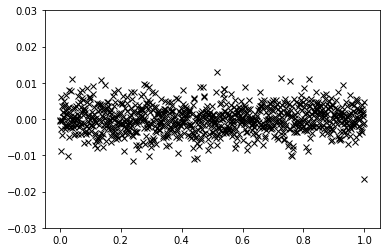

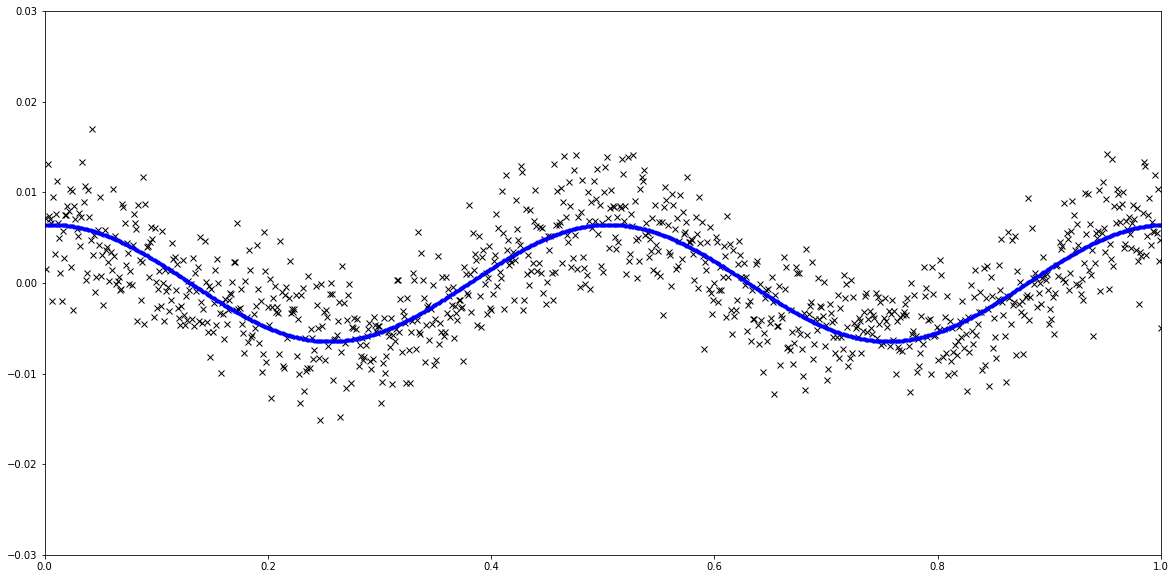

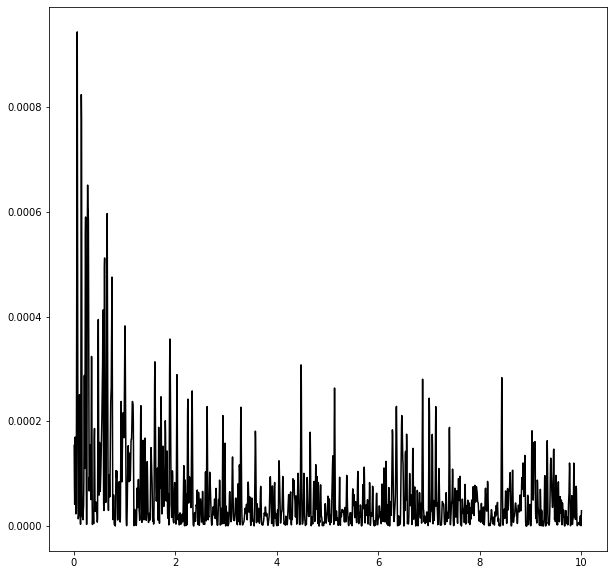

14.29184242510903


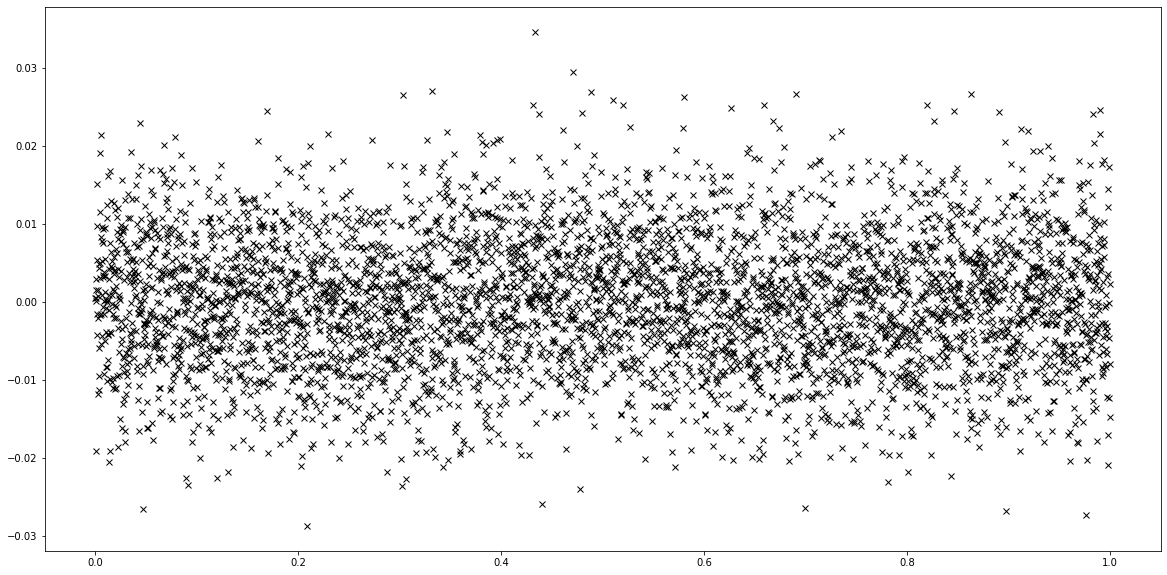

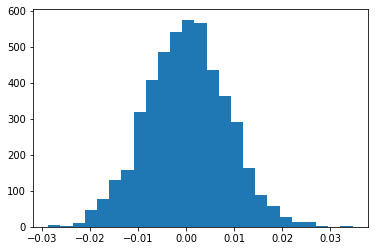

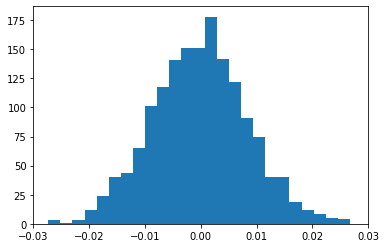

In [45]:

#allTimes allFlux
TMean = np.nanmean(np.pad(allTimes.astype(float), (0, 100 - allTimes.size%100), mode='constant', constant_values=np.NaN).reshape(-1, 100), axis=1)
FMean = np.nanmean(np.pad(allFlux.astype(float), (0, 100 - allFlux.size%100), mode='constant', constant_values=np.NaN).reshape(-1, 100), axis=1) 


tessPhases = foldMeth(allTimes,2.4402153346598467)
sortIndi = np.argsort(tessPhases)
tessPhases = tessPhases[sortIndi]
allFluxSorted = allFlux[sortIndi]
tessPhasesM = np.nanmean(np.pad(tessPhases.astype(float), (0, 50 - tessPhases.size%50), mode='constant', constant_values=np.NaN).reshape(-1, 50), axis=1)
allFluxSortedM = np.nanmean(np.pad(allFluxSorted.astype(float), (0, 50 - allFluxSorted.size%50), mode='constant', constant_values=np.NaN).reshape(-1, 50), axis=1)


somefluxes = 0.006446446446446446*np.sin(tessPhasesM*(2*np.pi/0.08029870152418028)+1.5031844728888097)
plt.plot(tessPhasesM, allFluxSortedM, 'kx')
#plt.plot(somePhases,somefluxes, 'b.')
plt.ylim(-0.03,0.03)
plt.show()
plt.figure(figsize=(20,10))
tessPhases = foldMeth(allTimes,0.08029870152418028*2)
sortIndi = np.argsort(tessPhases)
tessPhases = tessPhases[sortIndi]
allFluxSorted = allFlux[sortIndi]
tessPhasesM = np.nanmean(np.pad(tessPhases.astype(float), (0, 50 - tessPhases.size%50), mode='constant', constant_values=np.NaN).reshape(-1, 50), axis=1)
allFluxSortedM = np.nanmean(np.pad(allFluxSorted.astype(float), (0, 50 - allFluxSorted.size%50), mode='constant', constant_values=np.NaN).reshape(-1, 50), axis=1)
plt.plot(tessPhasesM, allFluxSortedM, 'kx')
#plt.plot(tessPhasesM-0.5, allFluxSortedM, 'bx')
plt.ylim(-0.03,0.03)
plt.xlim(0,1)
somefluxes = 0.006446446446446446*np.sin(allTimes*(2*np.pi/0.08029870152418028)+1.5031844728888097)
tessPhases = foldMeth(allTimes,0.08029870152418028*2)
sortIndi = np.argsort(tessPhases)
tessPhases = tessPhases[sortIndi]
somefluxes = somefluxes[sortIndi]
tessPhasesM = np.nanmean(np.pad(tessPhases.astype(float), (0, 50 - tessPhases.size%50), mode='constant', constant_values=np.NaN).reshape(-1, 50), axis=1)
somefluxes = np.nanmean(np.pad(somefluxes.astype(float), (0, 50 - somefluxes.size%50), mode='constant', constant_values=np.NaN).reshape(-1, 50), axis=1)
plt.plot(tessPhasesM, somefluxes, 'b.')
plt.show()


modelFluxes = 0.006446446446446446*np.sin(allTimes*(2*np.pi/0.08029870152418028)+1.5031844728888097)
residuals = allFlux - modelFluxes
freq = np.linspace(0.01,10,int(10000/5))
powerPl = LombScargle(allTimes,residuals).power(freq)
plt.figure(figsize=(10,10))
plt.plot(freq,powerPl, c='k')
plt.show()
print(1/freq[np.argmax(powerPl)])
#take every second vs 


tessPhases = foldMeth(allTimes,0.08029870152418028)
sortIndi = np.argsort(tessPhases)
tessPhases = tessPhases[sortIndi]
somefluxes = residuals[sortIndi]
tessPhasesM = np.nanmean(np.pad(tessPhases.astype(float), (0, 10 - tessPhases.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
somefluxes = np.nanmean(np.pad(somefluxes.astype(float), (0, 10 - somefluxes.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
plt.figure(figsize=(20,10))
plt.plot(tessPhasesM, somefluxes, 'kx')
plt.show()
plt.hist(somefluxes, bins=25)
plt.show()
chunksF = np.array_split(np.array(somefluxes),3)
plt.hist(chunksF[0], bins=25)
plt.xlim(-0.03,0.03)
plt.show()
plt.hist(chunksF[1], bins=25)
plt.xlim(-0.03,0.03)
plt.show()
plt.hist(chunksF[2], bins=25)
plt.xlim(-0.03,0.03)
plt.show()

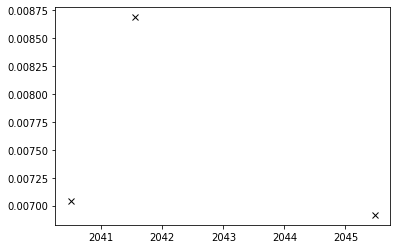

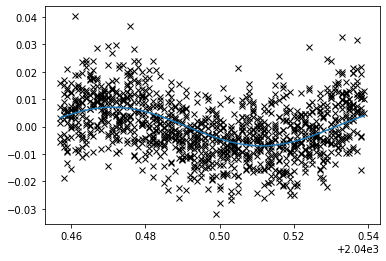

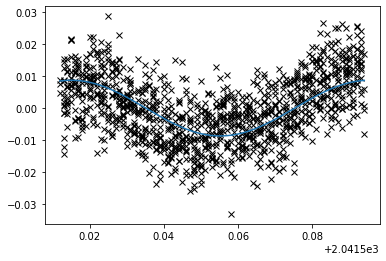

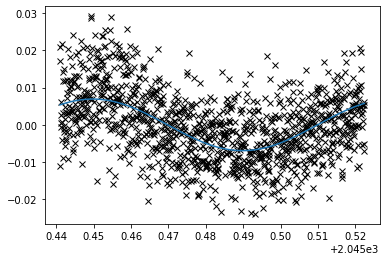

In [58]:
amp,time = sineFitLevenbergMarquardtLTAmp(timeLT,revFluxLT,1)
amp2,time2 = sineFitLevenbergMarquardtLTAmp(timeLT2,revFluxLT2,1)
amp3,time3 = sineFitLevenbergMarquardtLTAmp(timeLT3,revFluxLT3,1)
amps = np.append(amp,amp2)
amps = np.append(amps,amp3)
times = np.append(time,time2)
times = np.append(times,time3)
plt.plot(times, amps, 'kx')
plt.show()
plt.plot(timeLT, revFluxLT, 'kx')
plt.plot(timeLT,amp*np.sin(timeLT*(2*np.pi/0.08029870152418028)+1.5031844728888097))
plt.show()
plt.plot(timeLT2, revFluxLT2, 'kx')
plt.plot(timeLT2,amp2*np.sin(timeLT2*(2*np.pi/0.08029870152418028)+1.5031844728888097))
plt.show()
plt.plot(timeLT3, revFluxLT3, 'kx')
plt.plot(timeLT3,amp3*np.sin(timeLT3*(2*np.pi/0.08029870152418028)+1.5031844728888097))




In [315]:
phasesLT = foldMeth(timeLT,0.08029870250017346)
sortIndi = np.argsort(phasesLT)
phasesLT = phasesLT[sortIndi]
revFluxLT = revFluxLT[sortIndi]

phasesLT2 = foldMeth(timeLT2,0.08029870250017346)
sortIndi2 = np.argsort(phasesLT2)
phasesLT2 = phasesLT2[sortIndi2]
revFluxLT2 = revFluxLT2[sortIndi2]

phasesLT3 = foldMeth(timeLT3,0.08029870250017346)
sortIndi3 = np.argsort(phasesLT3)
phasesLT3 = phasesLT3[sortIndi3]
revFluxLT3 = revFluxLT3[sortIndi3]

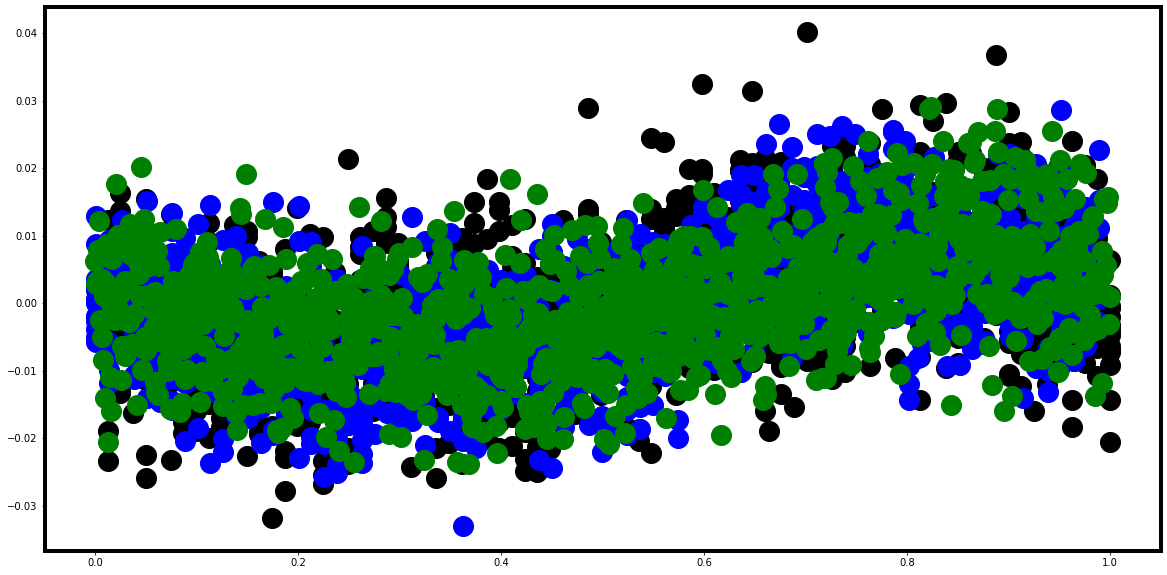

In [321]:
plt.figure(figsize=(20,10))
plt.plot(phasesLT, revFluxLT, marker='o', ms=20, c='k', ls='')
plt.plot(phasesLT2, revFluxLT2, marker='o', ms=20, c='b', ls='')
plt.plot(phasesLT3, revFluxLT3, marker='o', ms=20, c = 'g', ls='')

#plt.plot(timeLT,0.007732773277327733*np.sin(timeLT*(2*np.pi/0.08029870152418028)+0.6792632764518471))
#plt.plot(timeLT2,0.007732773277327733*np.sin(timeLT2*(2*np.pi/0.08029870152418028)+0.5723422051585008))
#plt.plot(timeLT3,0.007732773277327733*np.sin(timeLT3*(2*np.pi/0.08029870152418028)+0.2515789912784619))

[0.6792632764518471]
[0.5723422051585008]
[0.2515789912784619]


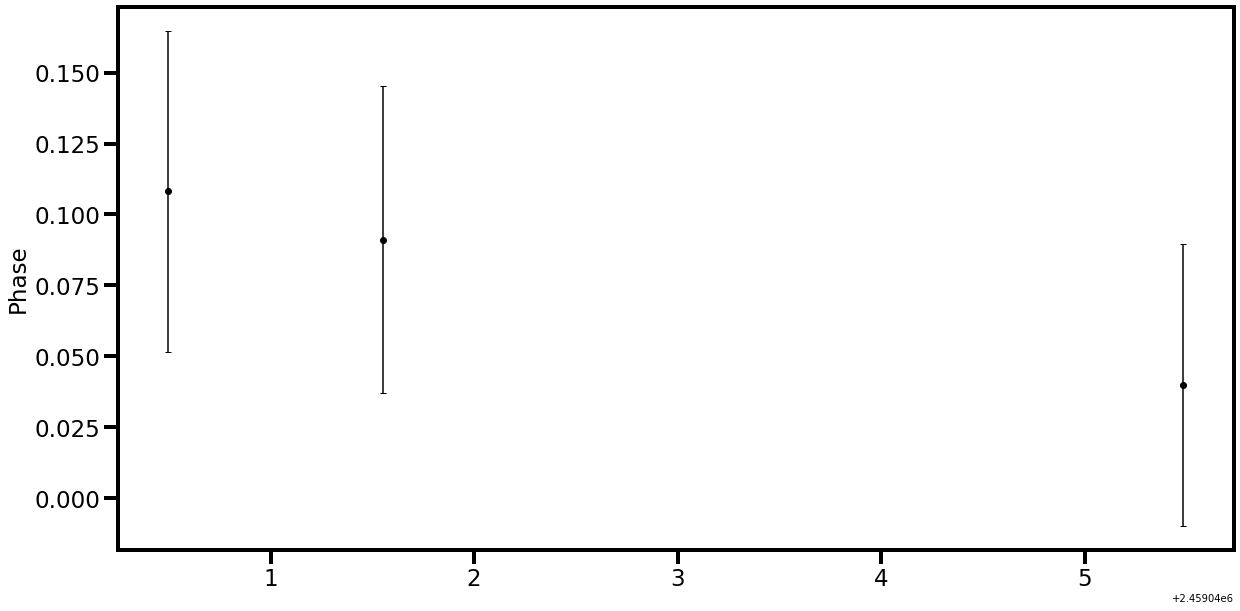

In [329]:


tmpAll = []
tmptAll=[]
errorAll = []
tmp, tmpt,error = sineFitLT(timeLT, revFluxLT, 1)
print(tmp)
tmpAll.append(tmp[0])
tmptAll.append(tmpt[0])
errorAll.append(error[0])
tmp, tmpt,error = sineFitLT(timeLT2, revFluxLT2, 1)
print(tmp)
tmpAll.append(tmp[0])
tmptAll.append(tmpt[0])
errorAll.append(error[0])
tmp, tmpt,error = sineFitLT(timeLT3, revFluxLT3, 1)
print(tmp)
tmpAll.append(tmp[0])
tmptAll.append(tmpt[0])
errorAll.append(error[0])
rc('axes', linewidth=4)
plt.figure(figsize=(20,10))
plt.errorbar(tmptAll, np.array(tmpAll)/(2*np.pi), yerr=errorAll, capsize=3, c='k', marker='o', ecolor='k', ls='')
#plt.ylim(-3,3)
plt.ylabel('Phase',fontsize=23)
#plt.xlabel('BJD - 2457000 (days)',fontsize=23)
plt.tick_params(which='both', width=4)
plt.tick_params(which='major', length=14)
plt.tick_params(labelsize=23)
#plt.savefig('O-CAll_1.pdf')
plt.show()

In [326]:


tmpAll = []
tmptAll=[]
errorAll = []
tmp, tmpt,error = sineFitLT(timeLT, revFluxLT, 1)
print(tmp)

tmp2, tmpt2,error2 = sineFitLT(timeLT2, revFluxLT2, 1)
print(tmp2)
tmpAll = np.append(tmp,tmp2)
tmptAll = np.append(tmpt,tmpt2)
errorAll = np.append(error,error2)
tmp3, tmpt3,error3 = sineFitLT(timeLT3, revFluxLT3, 1)
print(tmp3)
tmpAll = np.append(tmpAll,tmp3)
tmptAll = np.append(tmptAll, tmpt3)
errorAll = np.append(errorAll,error3)
rc('axes', linewidth=4)
plt.figure(figsize=(20,10))
plt.errorbar(tmptAll, tmpAll, yerr=errorAll, capsize=3, c='k', marker='o', ecolor='k', ls='')
#plt.ylim(-3,3)
plt.ylabel('Phase',fontsize=23)
#plt.xlabel('BJD - 2457000 (days)',fontsize=23)
plt.tick_params(which='both', width=4)
plt.tick_params(which='major', length=14)
plt.tick_params(labelsize=23)
#plt.savefig('O-CAll_1.pdf')
plt.show()

[0.6792632764518471]
[0.5723422051585008]
[0.2515789912784619]


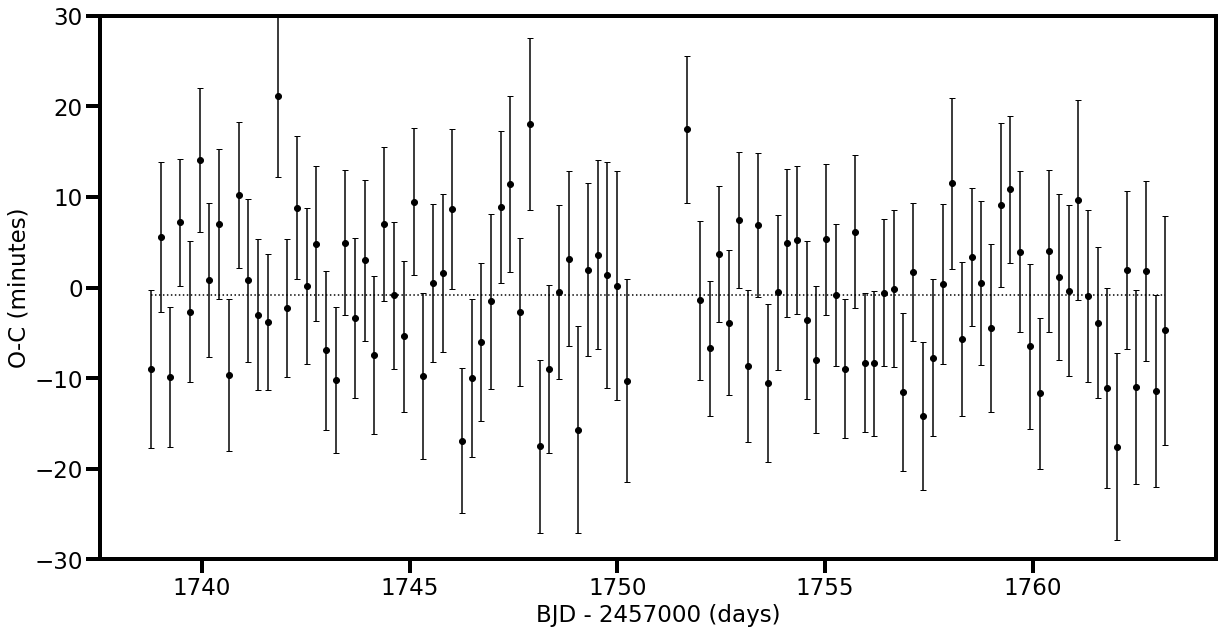

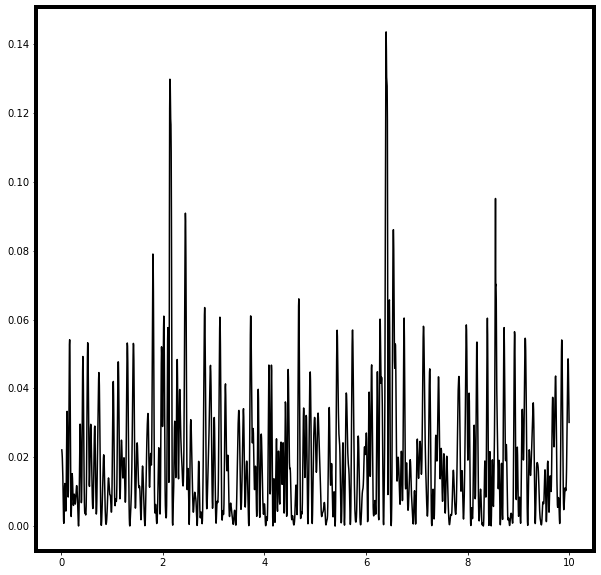

In [14]:
from pylab import rc
rc('axes', linewidth=4)
tmp, tmpt, error = sineFitLevenbergMarquardt(sec16t, sec16, 100)
plt.figure(figsize=(20,10))
meanline = 0.08029870*24*60*(np.mean(tmp)-1.5031844728888097)/(2*np.pi)
plt.plot([tmpt[0], tmpt[-1]], [meanline,meanline], ':k')
toplot = 0.08029870*24*60*(np.array(tmp)-1.5031844728888097)/(2*np.pi)
toerr = 0.08029870*24*60*(np.array(error))/(2*np.pi)
plt.errorbar(tmpt, toplot, yerr=toerr, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.ylim(-30,30)
plt.ylabel('O-C (minutes)',fontsize=23)
plt.xlabel('BJD - 2457000 (days)',fontsize=23)
plt.tick_params(which='both', width=4)
plt.tick_params(which='major', length=14)
plt.tick_params(labelsize=23)
#plt.savefig('O-C16_100.pdf')
plt.show()

freq = np.linspace(0.01,10,int(10000/5))
powerPl = LombScargle(tmpt,tmp).power(freq)
plt.figure(figsize=(10,10))
plt.plot(freq,powerPl, c='k')

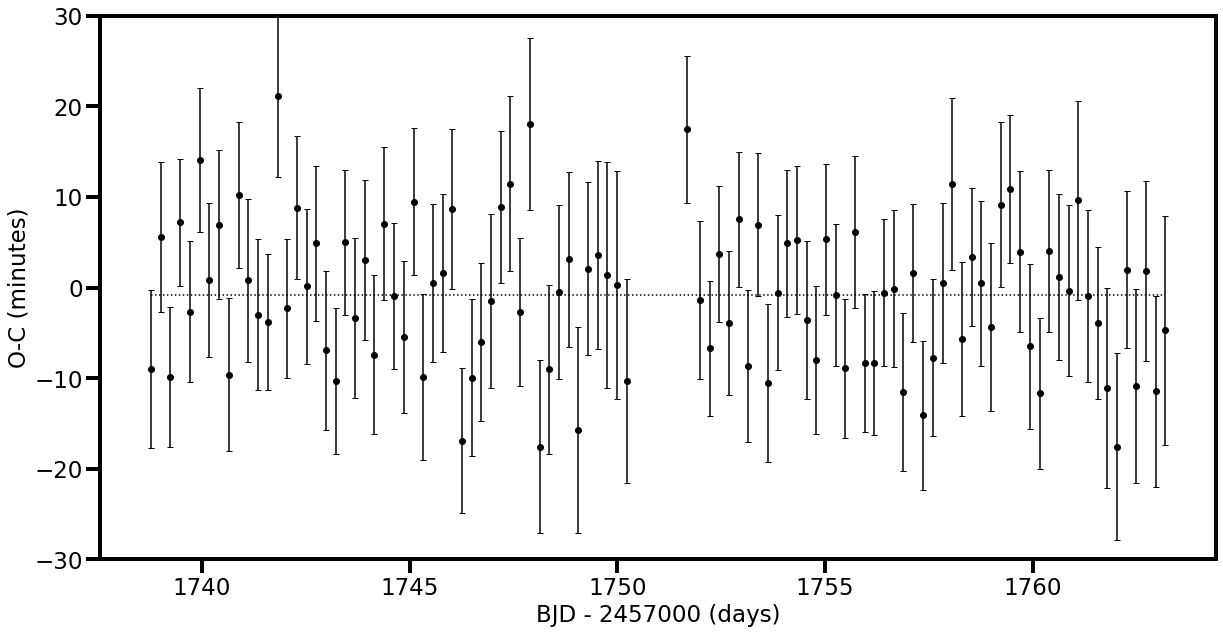

In [15]:
from pylab import rc
rc('axes', linewidth=4)
tmp, tmpt, error = sineFit(sec16t, sec16, 100)
plt.figure(figsize=(20,10))
meanline = 0.08029870*24*60*(np.mean(tmp)-1.5031844728888097)/(2*np.pi)
plt.plot([tmpt[0], tmpt[-1]], [meanline,meanline], ':k')
toplot = 0.08029870*24*60*(np.array(tmp)-1.5031844728888097)/(2*np.pi)
toerr = 0.08029870*24*60*(np.array(error))/(2*np.pi)
plt.errorbar(tmpt, toplot, yerr=toerr, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.ylim(-30,30)
plt.ylabel('O-C (minutes)',fontsize=23)
plt.xlabel('BJD - 2457000 (days)',fontsize=23)
plt.tick_params(which='both', width=4)
plt.tick_params(which='major', length=14)
plt.tick_params(labelsize=23)
plt.savefig('O-C16_100.pdf')
plt.show()

freq = np.linspace(0.01,10,int(10000/5))
powerPl = LombScargle(tmpt,tmp).power(freq)
plt.figure(figsize=(10,10))
plt.plot(freq,powerPl, c='k')

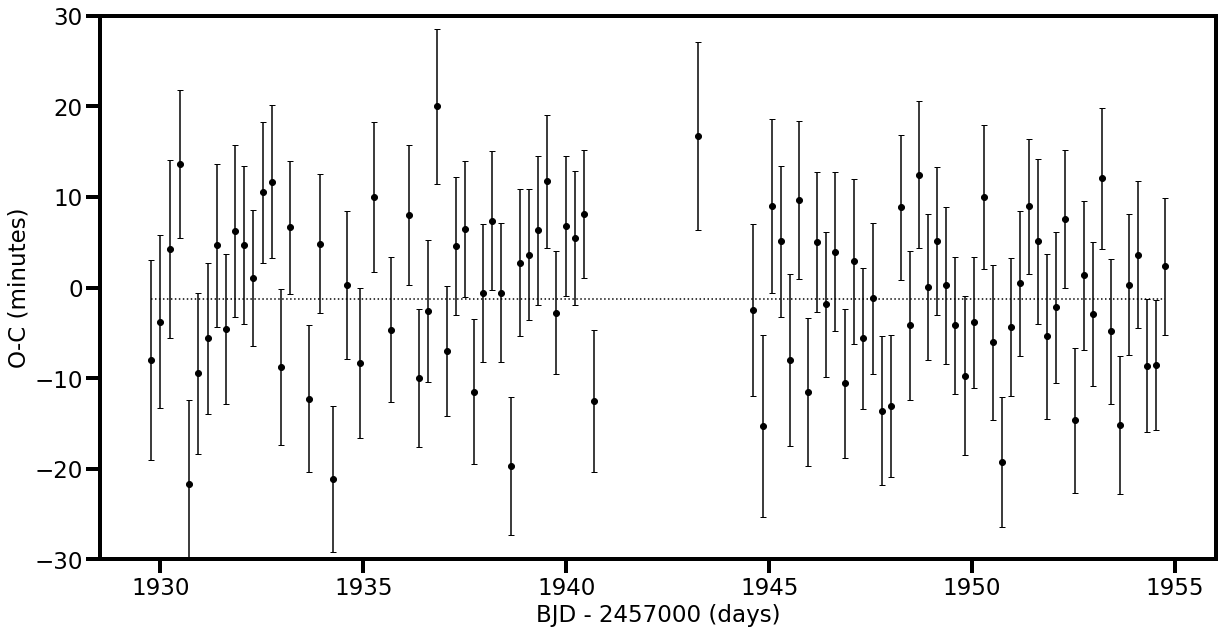

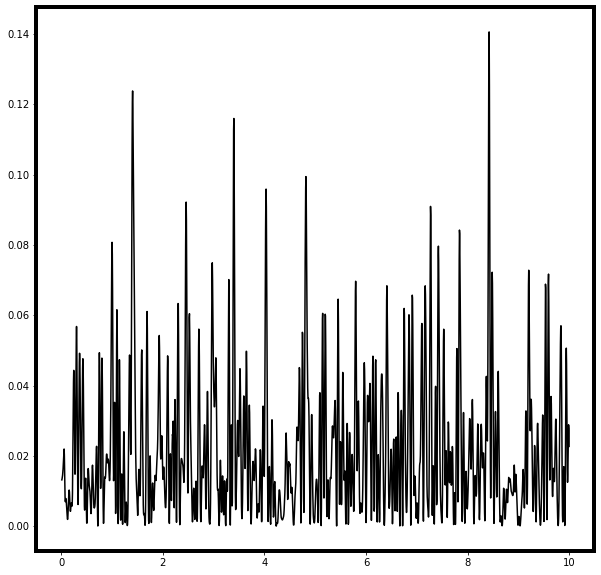

In [13]:
rc('axes', linewidth=4)
tmp, tmpt, error = sineFitLevenbergMarquardt(sec23t, sec23, 92)
plt.figure(figsize=(20,10))
meanline = 0.08029870*24*60*(np.mean(tmp)-1.5031844728888097)/(2*np.pi)
plt.plot([tmpt[0], tmpt[-1]], [meanline,meanline], ':k')
toplot = 0.08029870*24*60*(np.array(tmp)-1.5031844728888097)/(2*np.pi)
toerr = 0.08029870*24*60*(np.array(error))/(2*np.pi)
plt.errorbar(tmpt, toplot, yerr=toerr, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.ylim(-30,30)
plt.ylabel('O-C (minutes)',fontsize=23)
plt.xlabel('BJD - 2457000 (days)',fontsize=23)
plt.tick_params(which='both', width=4)
plt.tick_params(which='major', length=14)
plt.tick_params(labelsize=23)
#plt.savefig('O-C23_100.pdf')
plt.show()

freq = np.linspace(0.01,10,int(10000/5))
powerPl = LombScargle(tmpt,tmp).power(freq)
plt.figure(figsize=(10,10))
plt.plot(freq,powerPl, c='k')

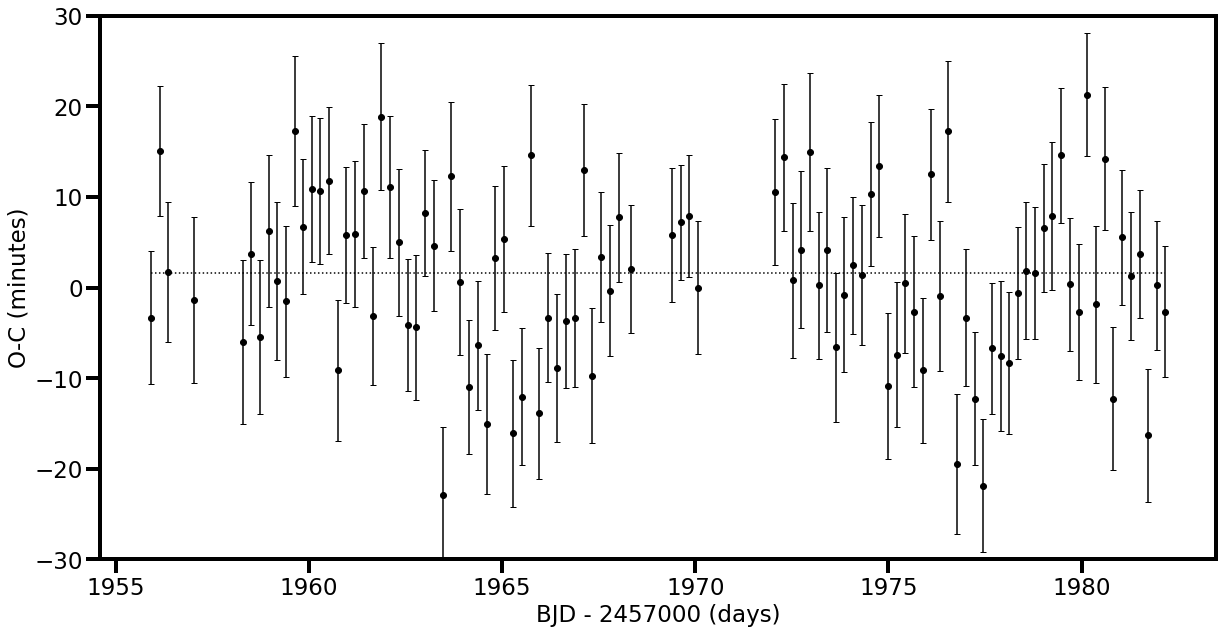

In [17]:
rc('axes', linewidth=4)
tmp, tmpt, error = sineFit(sec24t, sec24, 100)
plt.figure(figsize=(20,10))
meanline = 0.08029870*24*60*(np.mean(tmp)-1.5031844728888097)/(2*np.pi)
plt.plot([tmpt[0], tmpt[-1]], [meanline,meanline], ':k')
toplot = 0.08029870*24*60*(np.array(tmp)-1.5031844728888097)/(2*np.pi)
toerr = 0.08029870*24*60*(np.array(error))/(2*np.pi)
plt.errorbar(tmpt, toplot, yerr=toerr, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.ylim(-30,30)
plt.ylabel('O-C (minutes)',fontsize=23)
plt.xlabel('BJD - 2457000 (days)',fontsize=23)
plt.tick_params(which='both', width=4)
plt.tick_params(which='major', length=14)
plt.tick_params(labelsize=23)
plt.savefig('O-C24_100.pdf')
plt.show()



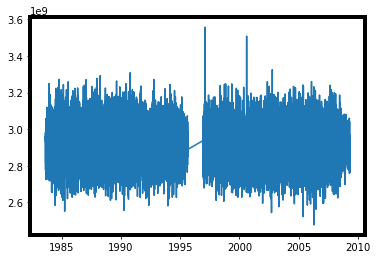

In [19]:
plt.plot(sec25t, sec25)

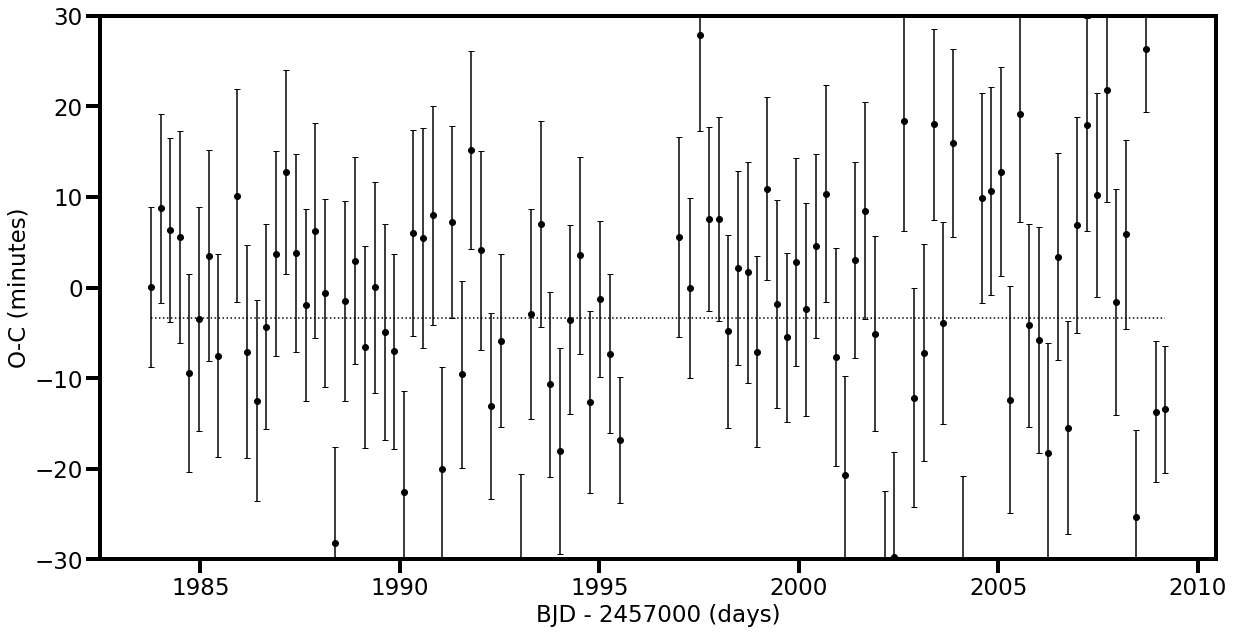

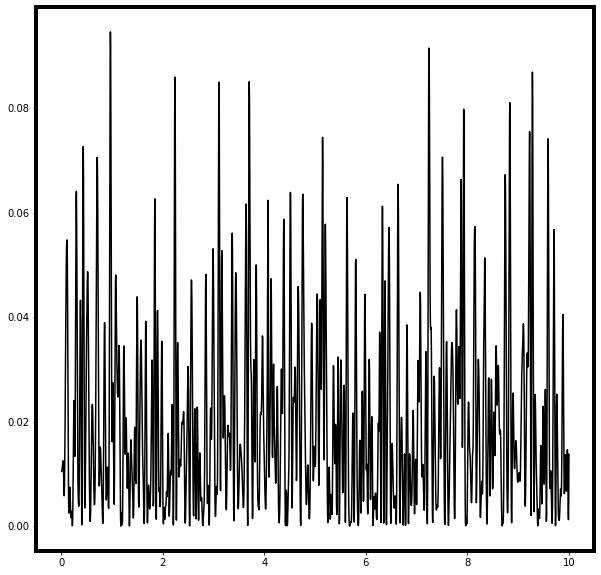

In [9]:
from pylab import rc
rc('axes', linewidth=4)
tmp, tmpt, error = sineFitLevenbergMarquardt(sec25t, sec25, 100)
plt.figure(figsize=(20,10))
meanline = 0.08029870*24*60*(np.mean(tmp)-1.5031844728888097)/(2*np.pi)
plt.plot([tmpt[0], tmpt[-1]], [meanline,meanline], ':k')
toplot = 0.08029870*24*60*(np.array(tmp)-1.5031844728888097)/(2*np.pi)
toerr = 0.08029870*24*60*(np.array(error))/(2*np.pi)
plt.errorbar(tmpt, toplot, yerr=toerr, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.ylim(-30,30)
plt.ylabel('O-C (minutes)',fontsize=23)
plt.xlabel('BJD - 2457000 (days)',fontsize=23)
plt.tick_params(which='both', width=4)
plt.tick_params(which='major', length=14)
plt.tick_params(labelsize=23)
#plt.savefig('O-C16_100.pdf')
plt.show()

freq = np.linspace(0.01,10,int(10000/5))
powerPl = LombScargle(tmpt,tmp).power(freq)
plt.figure(figsize=(10,10))
plt.plot(freq,powerPl, c='k')

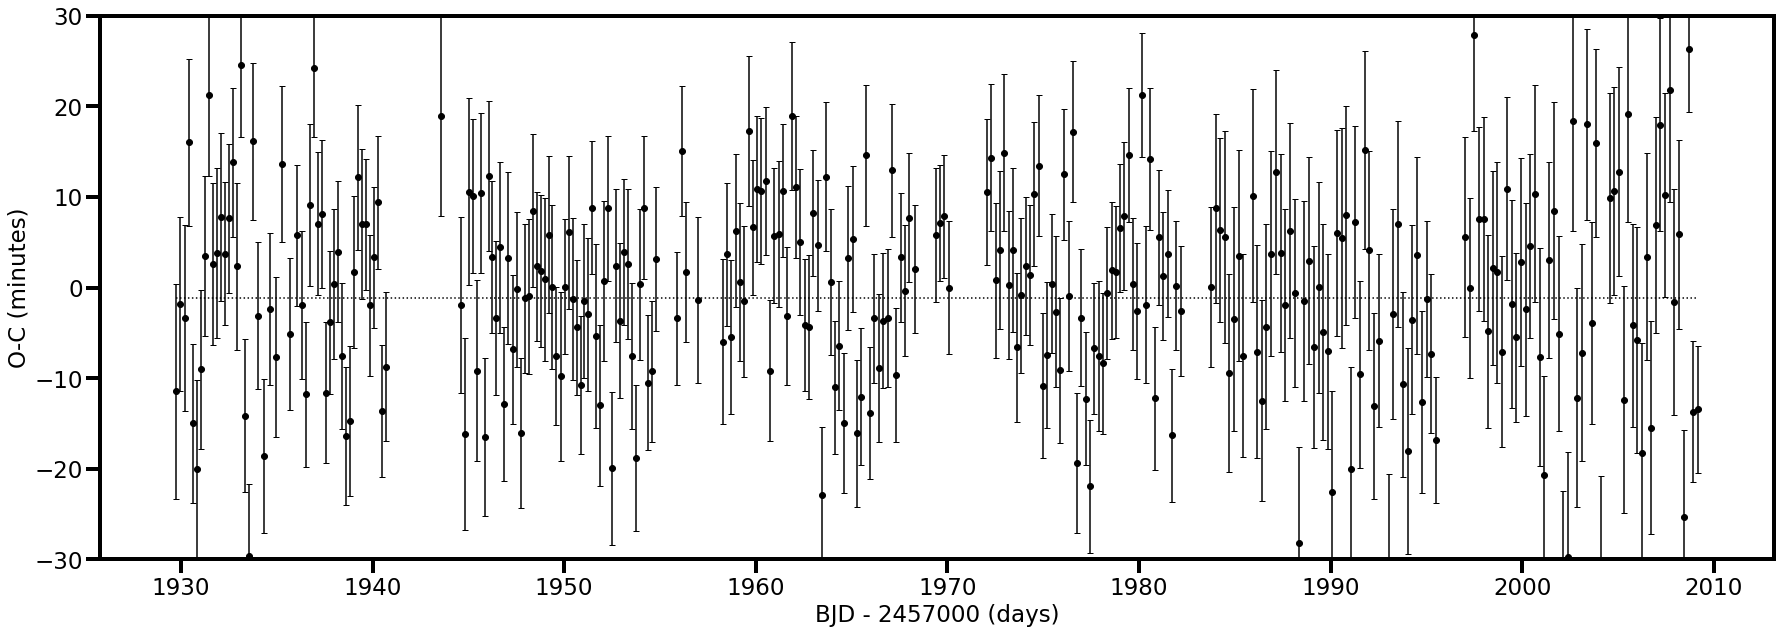

In [31]:
rc('axes', linewidth=4)
tmp23, tmpt23, error23 = sineFitLevenbergMarquardt(sec23t, sec23, 100)
tmp, tmpt, error = sineFitLevenbergMarquardt(sec24t, sec24, 100)
tmp25, tmpt25, error25 = sineFitLevenbergMarquardt(sec25t, sec25, 100)
tmp = np.append(tmp23,tmp)
tmpt = np.append(tmpt23,tmpt)
error = np.append(error23,error)
tmp = np.append(tmp,tmp25)
tmpt = np.append(tmpt,tmpt25)
error = np.append(error,error25)
plt.figure(figsize=(30,10))
meanline = 0.08029870*24*60*(np.mean(tmp)-1.5031844728888097)/(2*np.pi)
plt.plot([tmpt[0], tmpt[-1]], [meanline,meanline], ':k')
toplot = 0.08029870*24*60*(np.array(tmp)-1.5031844728888097)/(2*np.pi)
toerr = 0.08029870*24*60*(np.array(error))/(2*np.pi)
plt.errorbar(tmpt, toplot, yerr=toerr, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.ylim(-30,30)
plt.ylabel('O-C (minutes)',fontsize=23)
plt.xlabel('BJD - 2457000 (days)',fontsize=23)
plt.tick_params(which='both', width=4)
plt.tick_params(which='major', length=14)
plt.tick_params(labelsize=23)
#plt.savefig('O-C23_24_100.pdf')
plt.show()

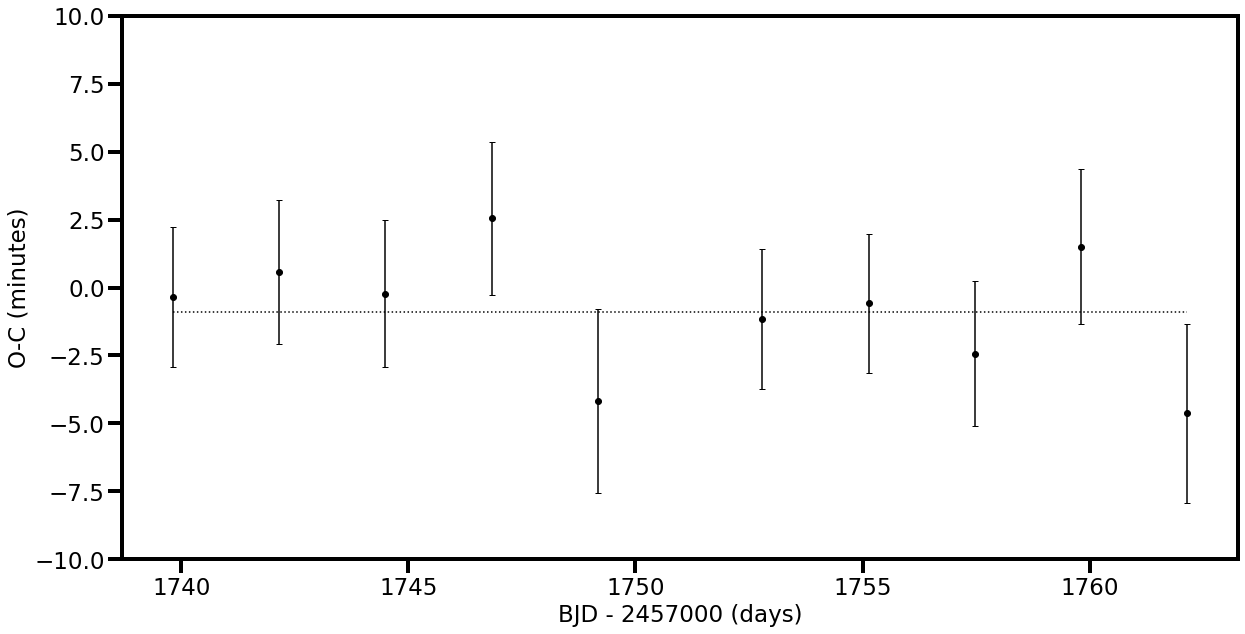

In [161]:
rc('axes', linewidth=4)
tmp, tmpt, error = sineFit(sec16t, sec16, 10)
plt.figure(figsize=(20,10))
meanline = 0.08029870*24*60*(np.mean(tmp)-1.5031844728888097)/(2*np.pi)
plt.plot([tmpt[0], tmpt[-1]], [meanline,meanline], ':k')
toplot = 0.08029870*24*60*(np.array(tmp)-1.5031844728888097)/(2*np.pi)
toerr = 0.08029870*24*60*(np.array(error))/(2*np.pi)
plt.errorbar(tmpt, toplot, yerr=toerr, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.ylim(-10,10)
plt.ylabel('O-C (minutes)',fontsize=23)
plt.xlabel('BJD - 2457000 (days)',fontsize=23)
plt.tick_params(which='both', width=4)
plt.tick_params(which='major', length=14)
plt.tick_params(labelsize=23)
plt.savefig('O-C16_10.pdf')
plt.show()


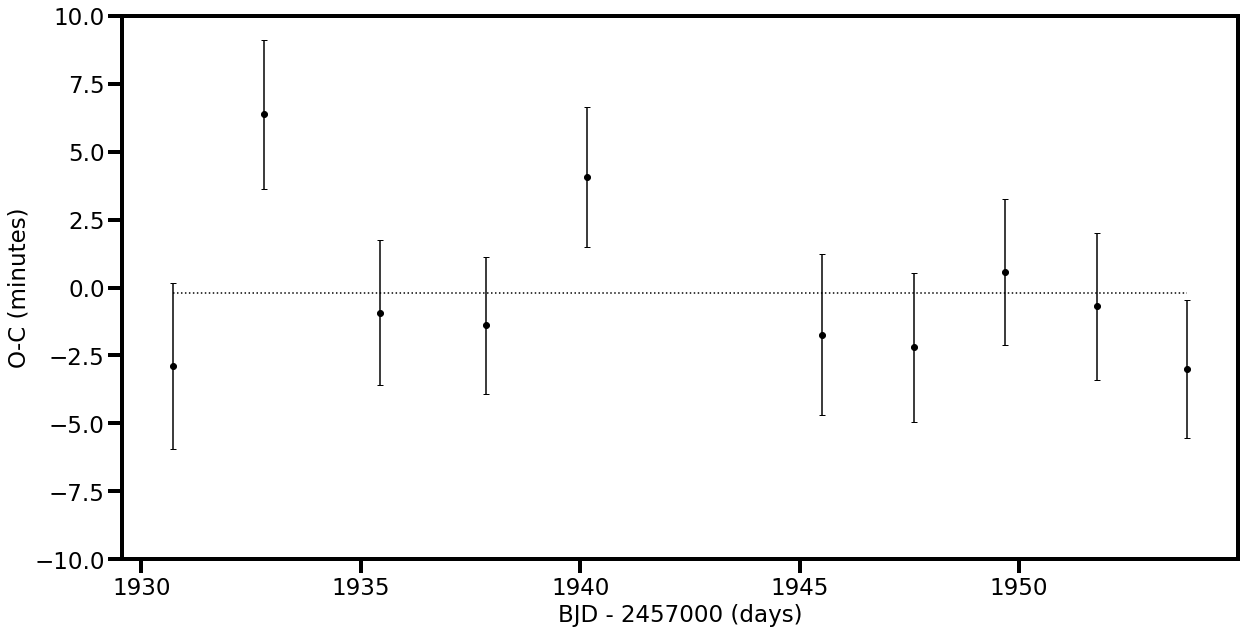

In [162]:
rc('axes', linewidth=4)
tmp, tmpt, error = sineFit(sec23t, sec23, 10)
plt.figure(figsize=(20,10))
meanline = 0.08029870*24*60*(np.mean(tmp)-1.5031844728888097)/(2*np.pi)
plt.plot([tmpt[0], tmpt[-1]], [meanline,meanline], ':k')
toplot = 0.08029870*24*60*(np.array(tmp)-1.5031844728888097)/(2*np.pi)
toerr = 0.08029870*24*60*(np.array(error))/(2*np.pi)
plt.errorbar(tmpt, toplot, yerr=toerr, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.ylim(-10,10)
plt.ylabel('O-C (minutes)',fontsize=23)
plt.xlabel('BJD - 2457000 (days)',fontsize=23)
plt.tick_params(which='both', width=4)
plt.tick_params(which='major', length=14)
plt.tick_params(labelsize=23)
plt.savefig('O-C23_10.pdf')
plt.show()


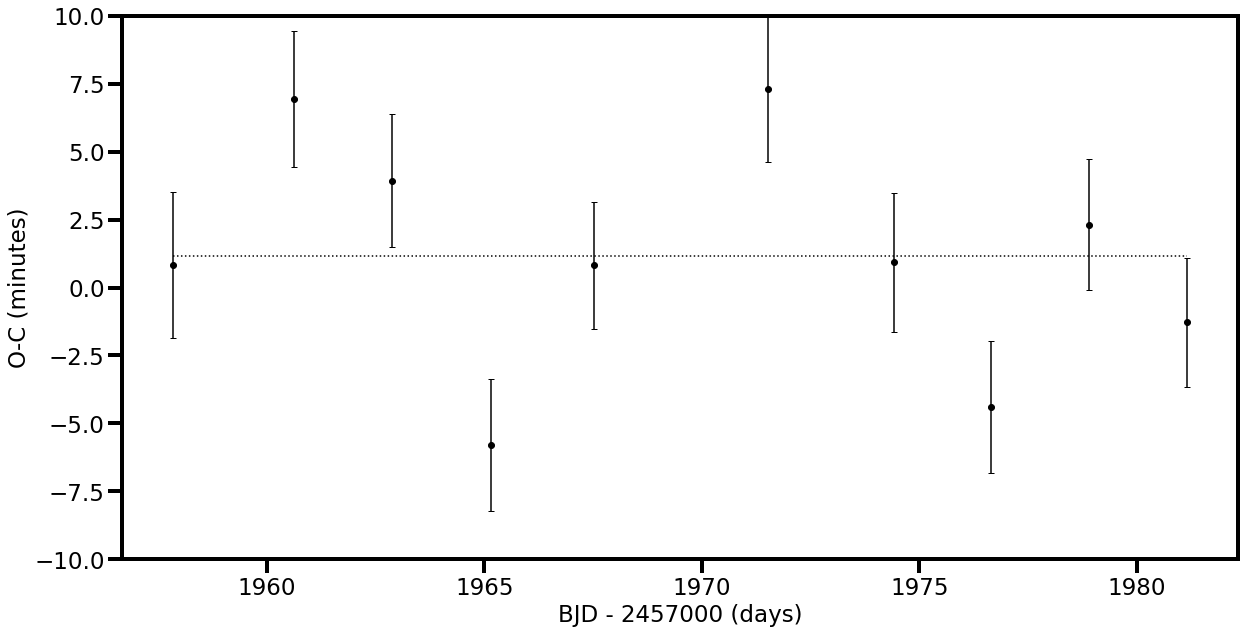

In [163]:
rc('axes', linewidth=4)
tmp, tmpt, error = sineFit(sec24t, sec24, 10)
plt.figure(figsize=(20,10))
meanline = 0.08029870*24*60*(np.mean(tmp)-1.5031844728888097)/(2*np.pi)
plt.plot([tmpt[0], tmpt[-1]], [meanline,meanline], ':k')
toplot = 0.08029870*24*60*(np.array(tmp)-1.5031844728888097)/(2*np.pi)
toerr = 0.08029870*24*60*(np.array(error))/(2*np.pi)
plt.errorbar(tmpt, toplot, yerr=toerr, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.ylim(-10,10)
plt.ylabel('O-C (minutes)',fontsize=23)
plt.xlabel('BJD - 2457000 (days)',fontsize=23)
plt.tick_params(which='both', width=4)
plt.tick_params(which='major', length=14)
plt.tick_params(labelsize=23)
plt.savefig('O-C24_10.pdf')
plt.show()


0.3186667222860517


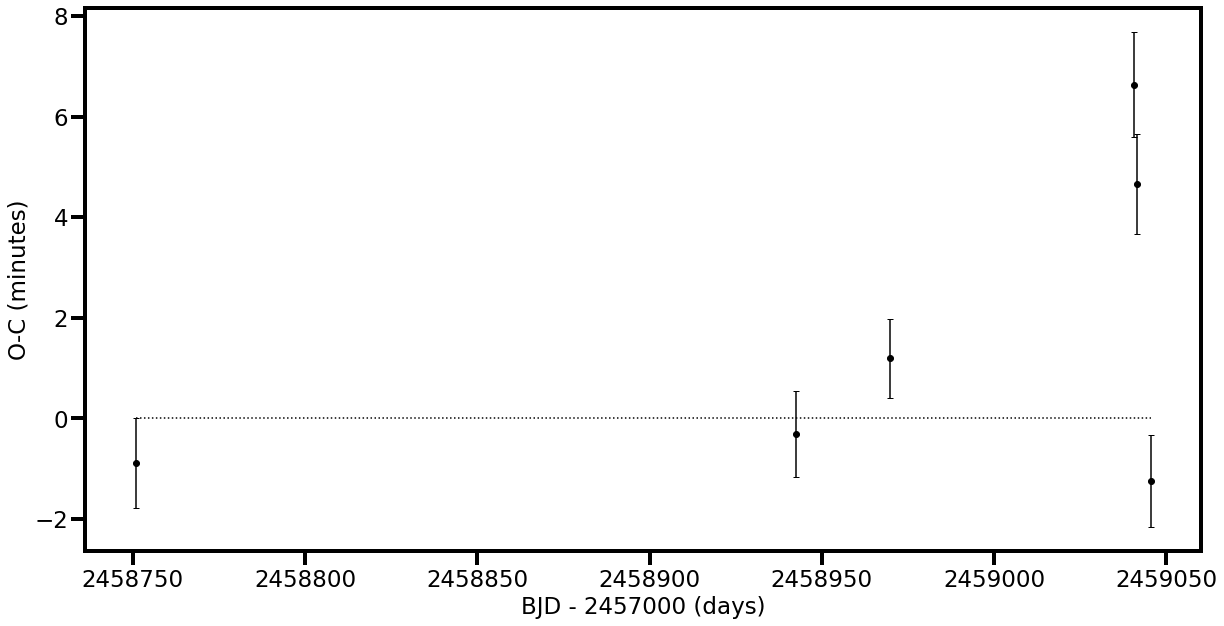

In [333]:
sec16tP = sec16t  +2457000
sec23tP = sec23t  +2457000
sec24tP = sec24t  +2457000
tmpAll = []
tmptAll = []
errorAll = []
tmp, tmpt,error = sineFit(sec16tP, sec16, 1)
tmpAll.append(tmp[0])
tmptAll.append(tmpt[0])
errorAll.append(error[0])
tmp, tmpt,error = sineFit(sec23tP, sec23, 1)
tmpAll.append(tmp[0])
tmptAll.append(tmpt[0])
errorAll.append(error[0])
tmp, tmpt,error = sineFit(sec24tP, sec24, 1)
tmpAll.append(tmp[0])
tmptAll.append(tmpt[0])
errorAll.append(error[0])
print(np.mean(tmpAll))
rc('axes', linewidth=4)
tmp, tmpt, error = sineFit(sec16tP, sec16, 10)
plt.figure(figsize=(20,10))
meanline = 0.08029870*24*60*(np.mean(tmpAll)-0.3186667222860517)/(2*np.pi)
plt.plot([tmptAll[0], tmptLT3[-1]], [meanline,meanline], ':k')
toplot = 0.08029870*24*60*(np.array(tmpAll)-0.3186667222860517)/(2*np.pi)
toerr = 0.08029870*24*60*(np.array(errorAll))/(2*np.pi)
plt.errorbar(tmptAll, toplot, yerr=toerr, capsize=3, c='k', marker='o', ecolor='k', ls='')
#plt.ylim(-3,3)
tmpLT1, tmptLT1,error1 = sineFitLT(timeLT, revFluxLT, 1)
tmpLT2, tmptLT2,error2 = sineFitLT(timeLT2, revFluxLT2, 1)
tmpLT3, tmptLT3,error3 = sineFitLT(timeLT3, revFluxLT3, 1)
toplotLT1 = 0.08029870*24*60*(np.array(tmpLT1)-0.3186667222860517)/(2*np.pi)
toplotLT2 = 0.08029870*24*60*(np.array(tmpLT2)-0.3186667222860517)/(2*np.pi)
toplotLT3 = 0.08029870*24*60*(np.array(tmpLT3)-0.3186667222860517)/(2*np.pi)
toerrLT1 = 0.08029870*24*60*(np.array(error1))/(2*np.pi)
toerrLT2 = 0.08029870*24*60*(np.array(error2))/(2*np.pi)
toerrLT3 = 0.08029870*24*60*(np.array(error3))/(2*np.pi)
plt.errorbar(tmptLT1, toplotLT1, yerr=toerrLT1, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.errorbar(tmptLT2, toplotLT2, yerr=toerrLT2, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.errorbar(tmptLT3, toplotLT3, yerr=toerrLT3, capsize=3, c='k', marker='o', ecolor='k', ls='')
plt.ylabel('O-C (minutes)',fontsize=23)
plt.xlabel('BJD - 2457000 (days)',fontsize=23)
plt.tick_params(which='both', width=4)
plt.tick_params(which='major', length=14)
plt.tick_params(labelsize=23)
#plt.savefig('O-CAll_1.pdf')
plt.show()

1.4964375540608608


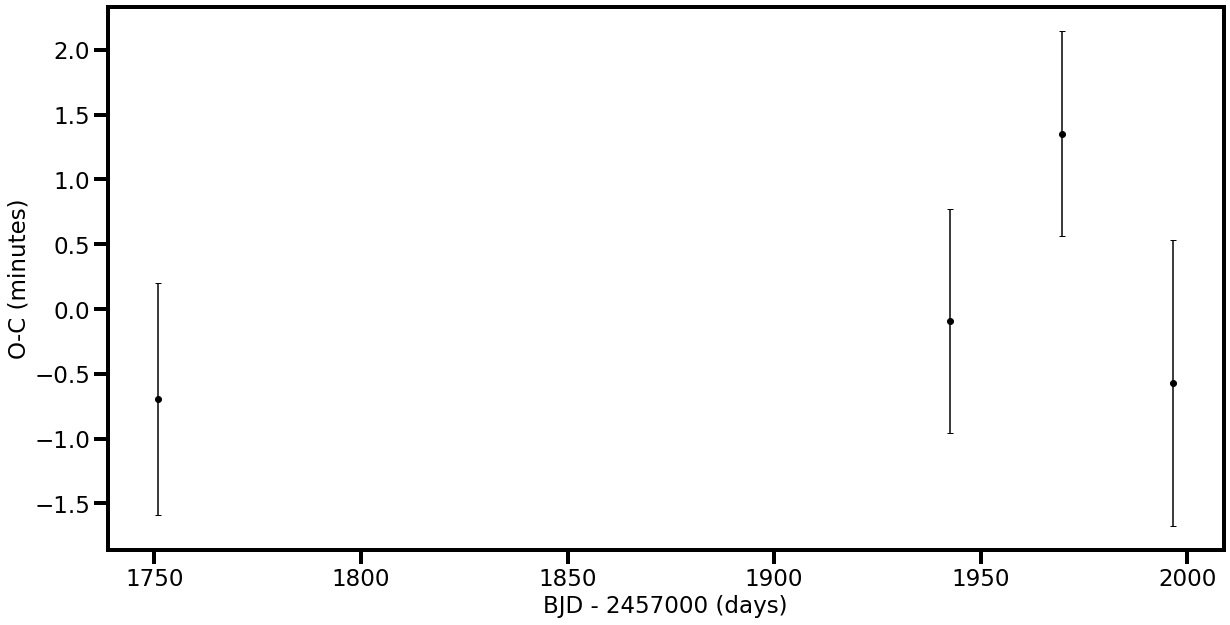

In [33]:
sec16tP = sec16t 
sec23tP = sec23t 
sec24tP = sec24t 
sec25tP = sec25t 
tmpAll = []
tmptAll = []
errorAll = []
tmp, tmpt,error = sineFitLevenbergMarquardt(sec16tP, sec16, 1)
tmpAll.append(tmp[0])
tmptAll.append(tmpt[0])
errorAll.append(error[0])
tmp, tmpt,error = sineFitLevenbergMarquardt(sec23tP, sec23, 1)
tmpAll.append(tmp[0])
tmptAll.append(tmpt[0])
errorAll.append(error[0])
tmp, tmpt,error = sineFitLevenbergMarquardt(sec24tP, sec24, 1)
tmpAll.append(tmp[0])
tmptAll.append(tmpt[0])
errorAll.append(error[0])

tmp, tmpt,error = sineFitLevenbergMarquardt(sec25tP, sec25, 1)
tmpAll.append(tmp[0])
tmptAll.append(tmpt[0])
errorAll.append(error[0])

print(np.mean(tmpAll))
rc('axes', linewidth=4)
plt.figure(figsize=(20,10))
meanline = 0.08029870*24*60*(np.mean(tmpAll)-1.4964375540608608)/(2*np.pi)
toplot = 0.08029870*24*60*(np.array(tmpAll)-1.4964375540608608)/(2*np.pi)
toerr = 0.08029870*24*60*(np.array(errorAll))/(2*np.pi)
plt.errorbar(tmptAll, toplot, yerr=toerr, capsize=3, c='k', marker='o', ecolor='k', ls='')
#plt.ylim(-3,3)


plt.ylabel('O-C (minutes)',fontsize=23)
plt.xlabel('BJD - 2457000 (days)',fontsize=23)
plt.tick_params(which='both', width=4)
plt.tick_params(which='major', length=14)
plt.tick_params(labelsize=23)
#plt.savefig('O-CAll_1.pdf')
plt.show()

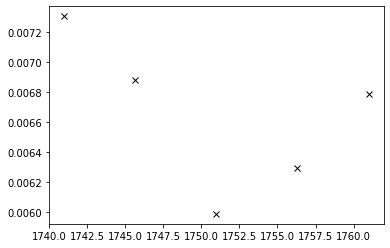

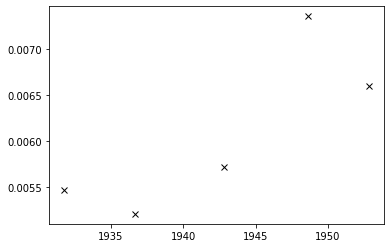

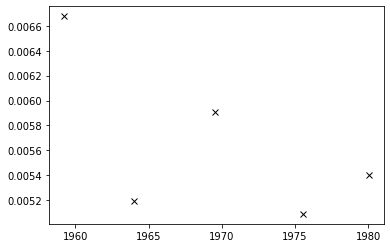

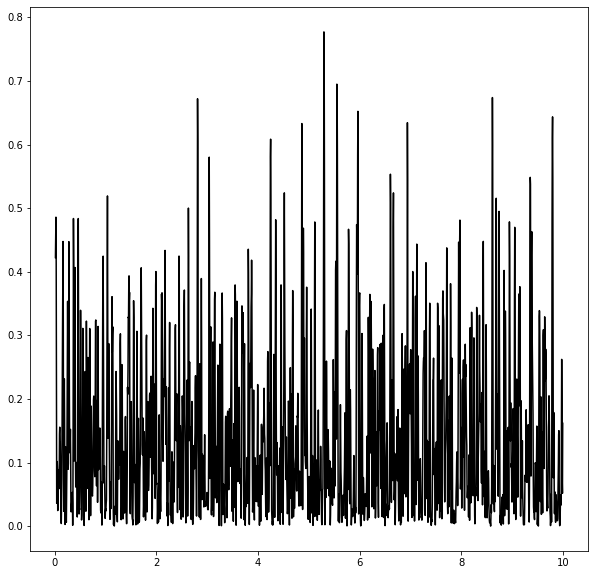

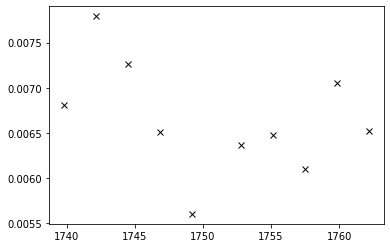

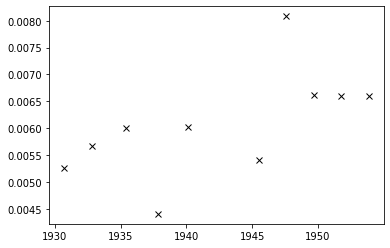

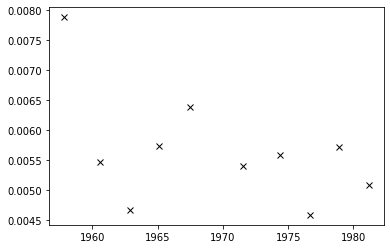

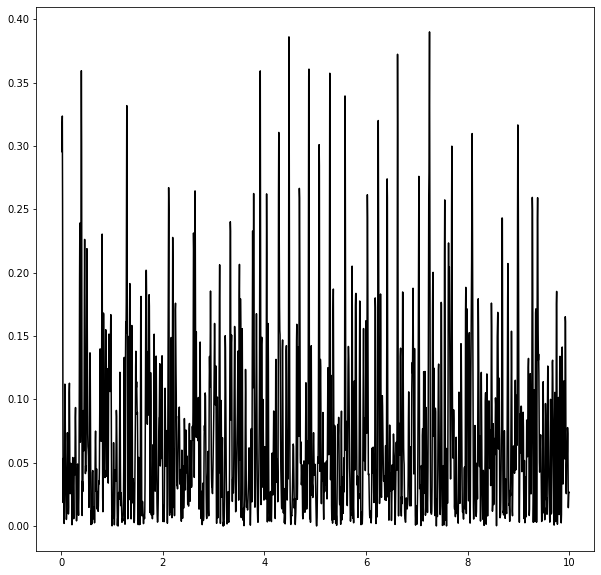

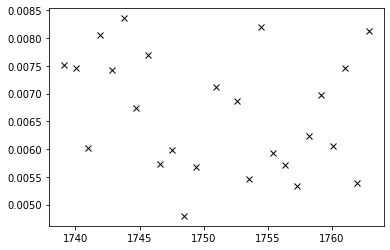

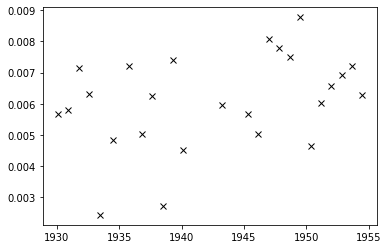

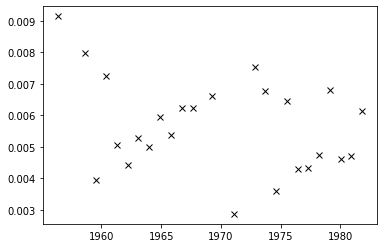

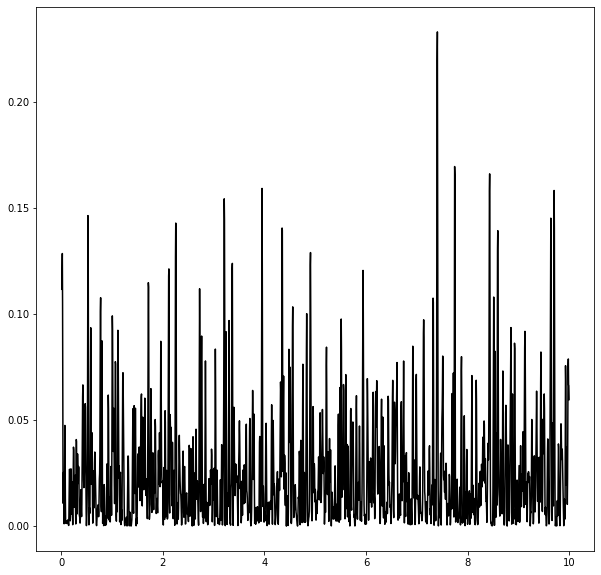

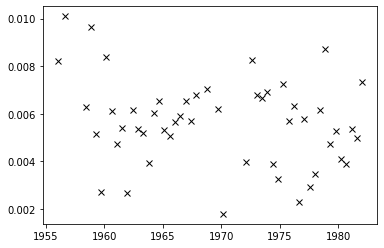

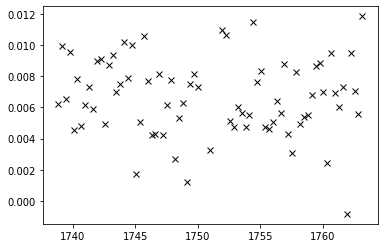

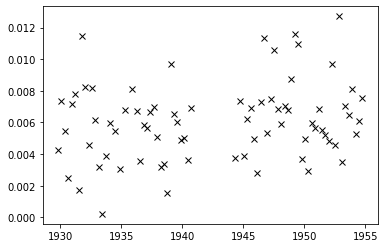

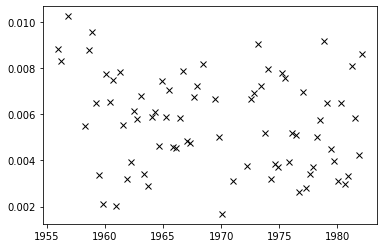

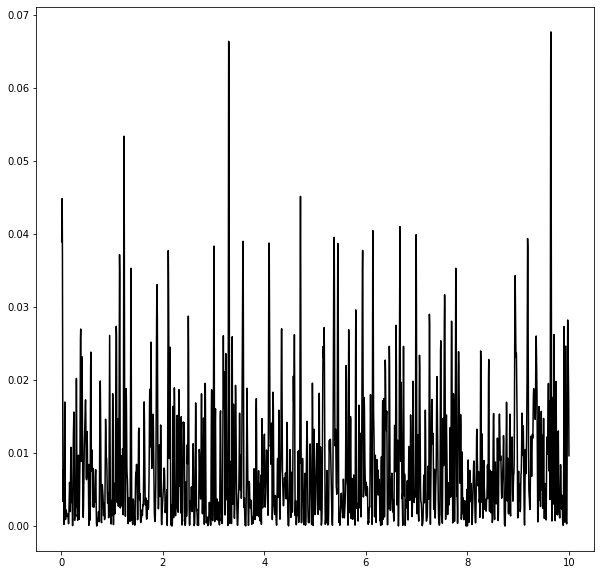

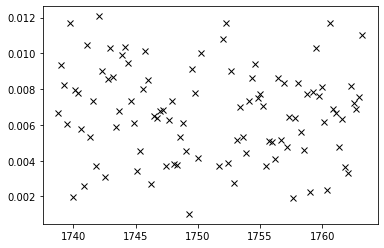

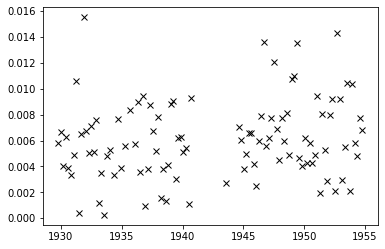

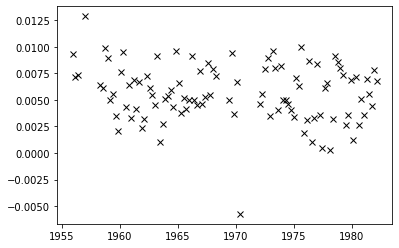

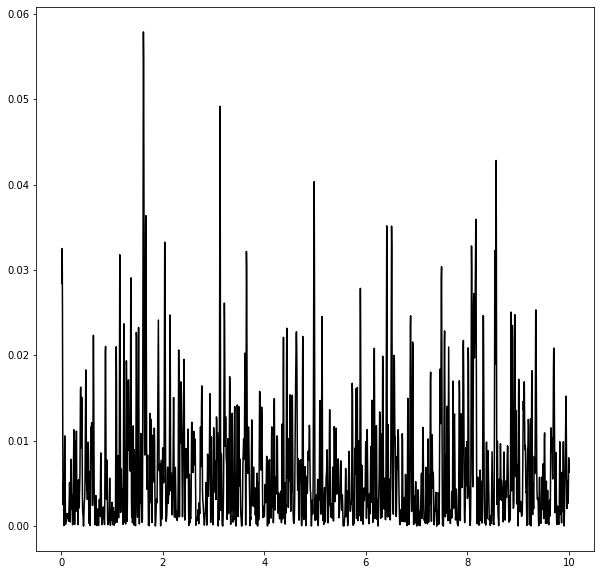

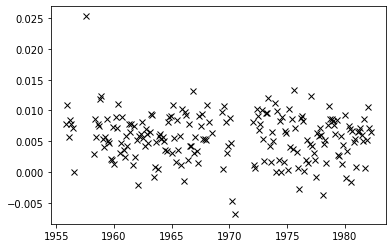

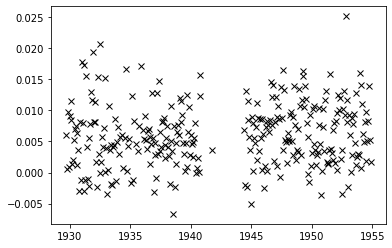

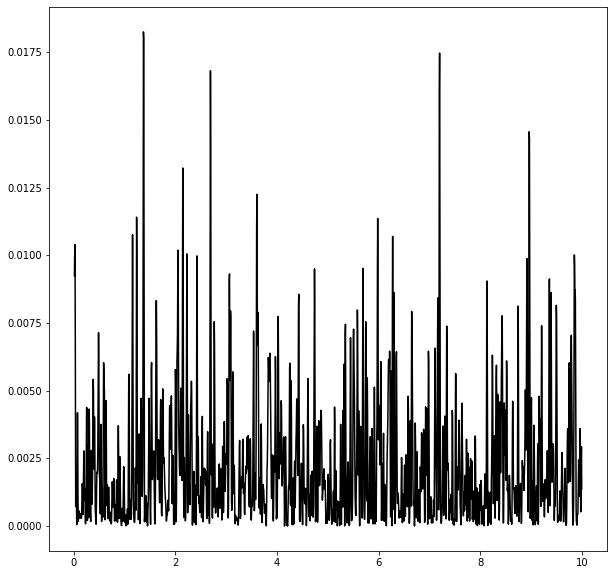

In [16]:
#jumphere
totrySlices = [5,10,25,50,75,100,200,300]
count = 0
for el in totrySlices:
    sec16tP = sec16t
    sec23tP = sec23t
    sec24tP = sec24t
    tmpAll = []
    tmptAll = []
    tmp1, tmpt1 = sineFitLevenbergMarquardtAmp(sec16tP, sec16, el)
    tmp2, tmpt2 = sineFitLevenbergMarquardtAmp(sec23tP, sec23, el)
    tmp3, tmpt3 = sineFitLevenbergMarquardtAmp(sec24tP, sec24, el)
    plt.plot(tmpt1,tmp1, 'kx')
    plt.show()
    plt.plot(tmpt2,tmp2, 'kx')
    plt.show()
    plt.plot(tmpt3,tmp3, 'kx')
    plt.show()
    tmpAll = np.append(tmp1, tmp2)
    tmpAll = np.append(tmpAll, tmp3)
    tmptAll = np.append(tmpt1, tmpt2)
    tmptAll = np.append(tmptAll, tmpt3)
    count = count +1
    freq = np.linspace(0.01,10,int(10000/5))
    powerPl = LombScargle(tmptAll,tmpAll/np.mean(tmpAll)).power(freq)
    plt.figure(figsize=(10,10))
    plt.plot(freq,powerPl, c='k')
    plt.show()

In [24]:
allTimes = np.append(sec16t, sec23t)
allTimes = np.append(allTimes, sec24t)
allFlux = np.append(sec16, sec23)
allFlux = np.append(allFlux, sec24)
#tmp, tmpt,error = sineFit(allTimes, allFlux, 1)
#print(np.mean(tmp))

In [62]:

tmp16, tmpt16,error16 = sineFit(sec16t, sec16, 25)
tmp23, tmpt23,error23 = sineFit(sec23t, sec23, 25)
tmp24, tmpt24,error24 = sineFit(sec24t, sec24, 25)
alltmps = np.append(tmp16, tmp23)
alltmps = np.append(alltmps, tmp24)
alltmpts = np.append(tmpt16, tmpt23)
alltmpts = np.append(alltmpts, tmpt24)
allerrors = np.append(error16,error23)
allerrors = np.append(allerrors, error24)
toplot = 0.08029870*24*60*(np.array(alltmps)-1.5031844728888097)/(2*np.pi)
toerr = 0.08029870*24*60*(np.array(allerrors))/(2*np.pi)
rc('axes', linewidth=4)

#f,(ax,ax2) = plt.subplots(2,2,gridspec_kw={'hspace': 0.6, 'wspace': 0.05},sharey=True, facecolor='w', figsize=(20,10))



fig = plt.figure(constrained_layout=True,figsize=(20,20),sharey=True, facecolor='w')
gs = GridSpec(2, 2, figure=fig)
ax = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])





# plot the same data on both axes
ax.errorbar(alltmpts, toplot, yerr=toerr, capsize=3, c='k', marker='o', ecolor='k', ls='')
ax2.errorbar(alltmpts, toplot, yerr=toerr, capsize=3, c='k', marker='o', ecolor='k', ls='')
ax.set_xlabel('BJD - 2457000 (days)',fontsize=23)
ax.set_ylabel('O-C (minutes)',fontsize=23)
ax.xaxis.set_label_coords(1.0, -0.1)
ax.set_xlim(1735,1764.99)
ax2.set_xlim(1929,1985)

#ax.set_ylim(100,1000)
#ax2.set_ylim(100,1000)


ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()

ax2.tick_params(labelright='on')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs, lw=4)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs, lw=4)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs, lw=4)
ax2.plot((-d,+d), (-d,+d), **kwargs, lw=4)
#ax.set_yticks(np.arange(0.9, 1.12, 0.05))
#ax2.set_yticks(np.arange(0.9, 1.12, 0.05))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=4)
ax.tick_params(which='major', length=14)
ax.tick_params(which='minor', length=8)
ax2.tick_params(which='both', width=4)
ax2.tick_params(which='major', length=14)
ax2.tick_params(which='minor', length=8)
ax.tick_params(labelsize=23)
ax2.tick_params(labelsize=23)


# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'
#plt.savefig('O-CAll_wrongRatio.pdf') 
plt.show()

TypeError: __init__() got an unexpected keyword argument 'sharey'

In [54]:
from pylab import rc
alltmps = np.append(tmp23, tmp24)
alltmpts = np.append(tmpt23, tmpt24)
allerrors = np.append(error23,error24)
toplot = 0.08029870*24*60*(np.array(alltmps)-1.5031844728888097)/(2*np.pi)
toerr = 0.08029870*24*60*(np.array(allerrors))/(2*np.pi)


toplot16 = 0.08029870*24*60*(np.array(tmp16)-1.5031844728888097)/(2*np.pi)
toerr16 = 0.08029870*24*60*(np.array(error16))/(2*np.pi)
fig = plt.figure(figsize=(20, 10)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.tick_left()
ax0.errorbar(tmpt16, toplot16, yerr=toerr16, capsize=3, c='k', marker='o', ecolor='k', ls='')
ax1 = plt.subplot(gs[1])
ax1.errorbar(alltmpts, toplot, yerr=toerr, capsize=3, c='k', marker='o', ecolor='k', ls='')
ax0.plot([tmpt16[0],tmpt16[-1]], [0,0], ':k')
ax1.set_xlabel('BJD - 2457000 (days)',fontsize=23)
ax1.plot([alltmpts[0],alltmpts[-1]], [0,0], ':k')
ax0.set_ylabel('O-C (minutes)',fontsize=23)
ax1.xaxis.set_label_coords(0.2, -0.08)
ax1.tick_params(labelright='on')
ax1.yaxis.tick_right()
ax0.yaxis.set_label_position("left")
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax0.tick_params(which='both', width=4)
ax0.tick_params(which='major', length=14)
ax0.tick_params(which='minor', length=8)
ax1.tick_params(which='both', width=4)
ax1.tick_params(which='major', length=14)
ax1.tick_params(which='minor', length=8)
ax0.tick_params(labelsize=23)
ax1.tick_params(labelsize=23)
ax0.set_ylim(-15,15)
ax1.set_ylim(-15,15)
ax0.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax0.transAxes, color='k', clip_on=False)
ax0.plot((1-d,1+d), (-d,+d), **kwargs, lw=4)
ax0.plot((1-d,1+d),(1-d,1+d), **kwargs, lw=4)
d = .015
kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
ax1.plot((-d/2,+d/2), (1-d,1+d), **kwargs, lw=4)
ax1.plot((-d/2,+d/2), (-d,+d), **kwargs, lw=4)
plt.tight_layout()
plt.savefig('O-CAll_sectors25.pdf')

In [16]:
print((len(sec16)/28)*2)
print((len(sec23)/24)*2)
print((len(sec24)/26)*2)
print((len(sec25)/28)*2)
print((len(sec26)/28)*2)

1200.857142857143
1237.5833333333333
1234.2307692307693
1231.857142857143
1210.142857142857


In [9]:

#hereis
tmp16, tmpt16, error16 = sineFitLevenbergMarquardt(sec16t, sec16, 28)
tmp23, tmpt23, error23 = sineFitLevenbergMarquardt(sec23t, sec23, 24)
tmp24, tmpt24, error24 = sineFitLevenbergMarquardt(sec24t, sec24, 26)
tmp25, tmpt25, error25 = sineFitLevenbergMarquardt(sec25t, sec25, 28)
alltmps = np.append(tmp23, tmp24)
alltmpts = np.append(tmpt23, tmpt24)
allerrors = np.append(error23,error24)
alltmps = np.append(alltmps, tmp25)
alltmpts = np.append(alltmpts, tmpt25)
allerrors = np.append(allerrors,error25)
toplot = 0.08029870*24*60*(np.array(alltmps)-1.5031844728888097)/(2*np.pi)
toerr = 0.08029870*24*60*(np.array(allerrors))/(2*np.pi)


toplot16 = 0.08029870*24*60*(np.array(tmp16)-1.5031844728888097)/(2*np.pi)
toerr16 = 0.08029870*24*60*(np.array(error16))/(2*np.pi)
fig1 = plt.figure(figsize=(20, 10)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2.7857]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.tick_left()
ax0.errorbar(tmpt16, toplot16, yerr=toerr16, capsize=3, c='k', marker='o', ecolor='k', ls='')
ax1 = plt.subplot(gs[1])
ax1.errorbar(alltmpts, toplot, yerr=toerr, capsize=3, c='k', marker='o', ecolor='k', ls='')
ax0.plot([tmpt16[0],tmpt16[-1]], [0,0], ':k')
ax1.set_xlabel('BJD - 2457000 (days)',fontsize=23)
ax1.plot([alltmpts[0],alltmpts[-1]], [0,0], ':k')
ax0.set_ylabel('O-C (minutes)',fontsize=23)
ax1.xaxis.set_label_coords(0.3, -0.08)
ax1.tick_params(labelright='on')
ax1.yaxis.tick_right()
ax0.yaxis.set_label_position("left")
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax0.tick_params(which='both', width=4)
ax0.tick_params(which='major', length=14)
ax0.tick_params(which='minor', length=8)
ax1.tick_params(which='both', width=4)
ax1.tick_params(which='major', length=14)
ax1.tick_params(which='minor', length=8)
ax0.tick_params(labelsize=23)
ax1.tick_params(labelsize=23)
ax0.set_ylim(-15,15)
ax1.set_ylim(-15,15)
ax0.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax0.transAxes, color='k', clip_on=False)
ax0.plot((1-d,1+d), (-d,+d), **kwargs, lw=4)
ax0.plot((1-d,1+d),(1-d,1+d), **kwargs, lw=4)
d = .015
kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
ax1.plot((-d/3,+d/3), (1-d,1+d), **kwargs, lw=4)
ax1.plot((-d/3,+d/3), (-d,+d), **kwargs, lw=4)
plt.tight_layout()
#plt.savefig('O-Cpap.eps')



fig2 = plt.figure(figsize=(20, 10)) 
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
toLombT = np.append(tmpt16,alltmpts)
toLombF = np.append(toplot16,toplot)
freq = np.linspace(0.01,1,10000)
powerPl = LombScargle(toLombT,toLombF).power(freq)
plt.plot(freq,powerPl, c='k')
ax0.tick_params(which='both', width=4)
ax0.tick_params(which='major', length=14)
ax0.tick_params(which='minor', length=8)
ax0.tick_params(labelsize=23)
ax0.set_ylabel('Lomb-Scargle power',fontsize=23)
ax0.set_xlabel('Frequency (Cycles/day)',fontsize=23)
plt.plot([0.01,1],[0.2016358844833581,0.2016358844833581],c='k',ls='dashed')
ax0.set_xlim(0,1)
plt.tight_layout()
#plt.savefig('O-CLSpap.eps')


np.save('TESStmpt16.npy', tmpt16)
np.save('TESStoplot16.npy', toplot16)
np.save('TESStoerr16.npy', toerr16)
np.save('TESSalltmpts.npy', alltmpts)
np.save('TESStoplot.npy', toplot)
np.save('TESStoerr.npy', toerr)

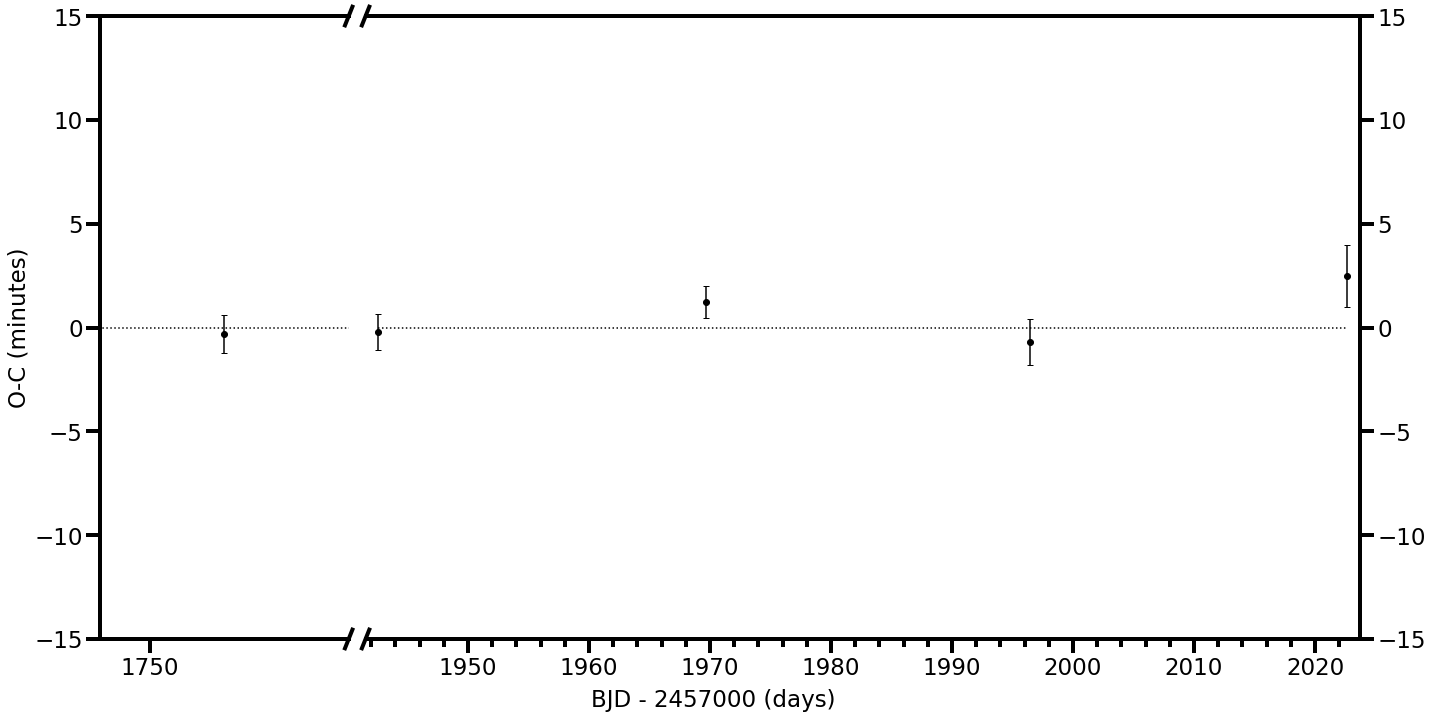

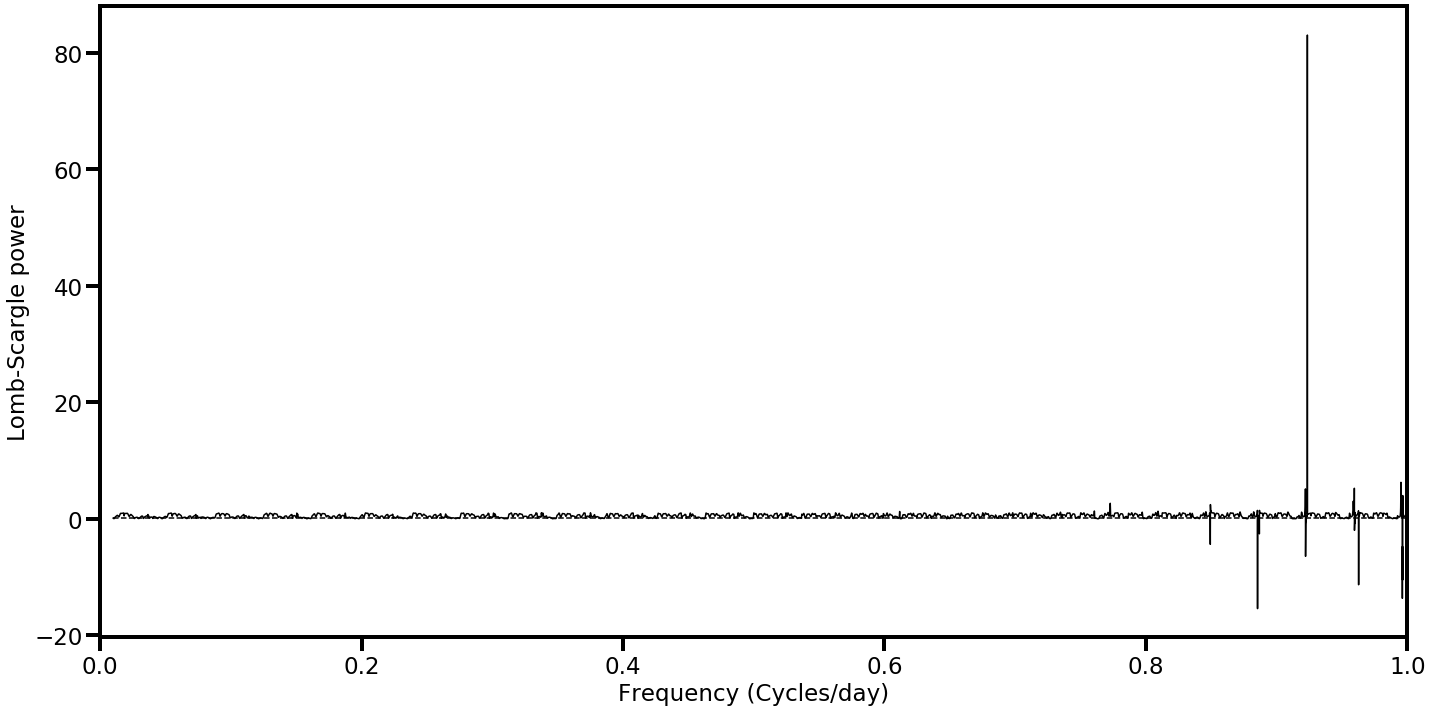

In [12]:
rc('axes', linewidth=4)
#hereis
tmp16, tmpt16, error16 = sineFitLevenbergMarquardt(sec16t, sec16, 1)
tmp23, tmpt23, error23 = sineFitLevenbergMarquardt(sec23t, sec23, 1)
tmp24, tmpt24, error24 = sineFitLevenbergMarquardt(sec24t, sec24, 1)
tmp25, tmpt25, error25 = sineFitLevenbergMarquardt(sec25t, sec25, 1)
tmp26, tmpt26, error26 = sineFitLevenbergMarquardt(sec26t, sec26, 1)
alltmps = np.append(tmp23, tmp24)
alltmpts = np.append(tmpt23, tmpt24)
allerrors = np.append(error23,error24)
alltmps = np.append(alltmps, tmp25)
alltmpts = np.append(alltmpts, tmpt25)
allerrors = np.append(allerrors,error25)
alltmps = np.append(alltmps, tmp26)
alltmpts = np.append(alltmpts, tmpt26)
allerrors = np.append(allerrors,error26)
toplot = 0.08029870*24*60*(np.array(alltmps)-1.5031844728888097)/(2*np.pi)
toerr = 0.08029870*24*60*(np.array(allerrors))/(2*np.pi)


toplot16 = 0.08029870*24*60*(np.array(tmp16)-1.5031844728888097)/(2*np.pi)
toerr16 = 0.08029870*24*60*(np.array(error16))/(2*np.pi)
fig1 = plt.figure(figsize=(20, 10)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[len(tmpt16), len(alltmpts)]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.tick_left()
ax0.errorbar(tmpt16, toplot16, yerr=toerr16, capsize=3, c='k', marker='o', ecolor='k', ls='')
ax1 = plt.subplot(gs[1])
ax1.errorbar(alltmpts, toplot, yerr=toerr, capsize=3, c='k', marker='o', ecolor='k', ls='')
ax0.plot([sec16t[0],sec16t[-1]], [0,0], ':k')
ax1.set_xlabel('BJD - 2457000 (days)',fontsize=23)
ax1.plot([alltmpts[0],alltmpts[-1]], [0,0], ':k')
ax0.set_ylabel('O-C (minutes)',fontsize=23)
ax1.xaxis.set_label_coords(0.35, -0.08)
ax1.tick_params(labelright='on')
ax1.yaxis.tick_right()
ax0.yaxis.set_label_position("left")
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_minor_locator(AutoMinorLocator())


phaserange = ['1740','1750','1760']
phaseX = np.linspace(1740,1760,3)
ax0.set_xticks(phaseX)
ax0.set_xticklabels(phaserange)
phaserange = ['1940','1950','1960','1970','1980','1990','2000','2010','2020','2030']
phaseX = np.linspace(1940,2030,10)
ax1.set_xticks(phaseX)
ax1.set_xticklabels(phaserange)


ax0.tick_params(which='both', width=4)
ax0.tick_params(which='major', length=14)
ax0.tick_params(which='minor', length=8)
ax1.tick_params(which='both', width=4)
ax1.tick_params(which='major', length=14)
ax1.tick_params(which='minor', length=8)
ax0.tick_params(labelsize=23)
ax1.tick_params(labelsize=23)
ax0.set_ylim(-15,15)
ax1.set_ylim(-15,15)
ax0.set_xlim(tmpt16[0]-1,tmpt16[-1]+1)
ax1.set_xlim(alltmpts[0]-1,alltmpts[-1]+1)
ax0.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax0.transAxes, color='k', clip_on=False)
ax0.plot((1-d,1+d), (-d,+d), **kwargs, lw=4)
ax0.plot((1-d,1+d),(1-d,1+d), **kwargs, lw=4)
d = .015
kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
ax1.plot((-d/4,+d/4), (1-d,1+d), **kwargs, lw=4)
ax1.plot((-d/4,+d/4), (-d,+d), **kwargs, lw=4)
plt.tight_layout()
plt.savefig('O-Cpap.eps')



fig2 = plt.figure(figsize=(20, 10)) 
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
toLombT = np.append(tmpt16,alltmpts)
toLombF = np.append(toplot16,toplot)
freq = np.linspace(0.01,1,10000)
powerPl = LombScargle(toLombT,toLombF).power(freq)
plt.plot(freq,powerPl, c='k')
ax0.tick_params(which='both', width=4)
ax0.tick_params(which='major', length=14)
ax0.tick_params(which='minor', length=8)
ax0.tick_params(labelsize=23)
ax0.set_ylabel('Lomb-Scargle power',fontsize=23)
ax0.set_xlabel('Frequency (Cycles/day)',fontsize=23)
plt.plot([0.01,1],[0.1573451107564774,0.1573451107564774],c='k',ls='dashed')
ax0.set_xlim(0,1)
plt.tight_layout()
#plt.savefig('O-CLSpap.eps')


np.save('TESStmpt16HST.npy', tmpt16)
np.save('TESStoplot16HST.npy', toplot16)
np.save('TESStoerr16HST.npy', toerr16)
np.save('TESSalltmptsHST.npy', alltmpts)
np.save('TESStoplotHST.npy', toplot)
np.save('TESStoerrHST.npy', toerr)

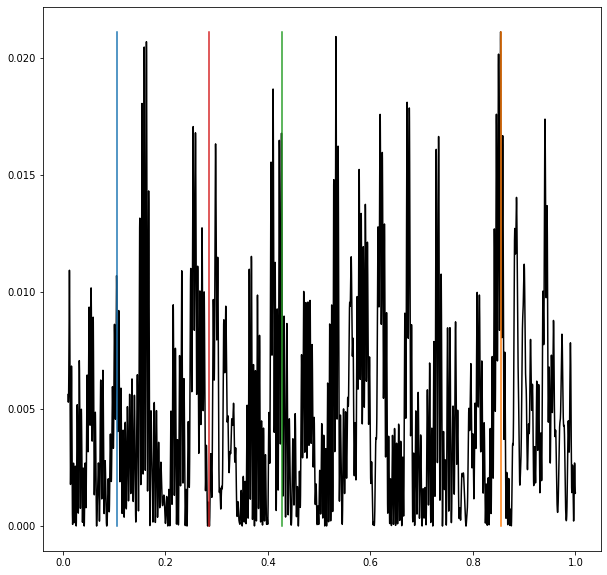

In [29]:


toLombT = np.append(tmpt16,alltmpts)
toLombF = np.append(toplot16,toplot)
freq = np.linspace(0.01,1,10000)
powerPl = LombScargle(toLombT,toLombF).power(freq)
plt.figure(figsize=(10,10))
plt.plot(freq,powerPl, c='k')
plt.plot([1/9.52,1/9.52],[0,max(powerPl)])
plt.plot([1/1.1707430161122059,1/1.1707430161122059],[0,max(powerPl)])
plt.plot([1/1.1707430161122059/2,1/1.1707430161122059/2],[0,max(powerPl)])
plt.plot([1/1.1707430161122059/3,1/1.1707430161122059/3],[0,max(powerPl)])

#0.05549569485628161

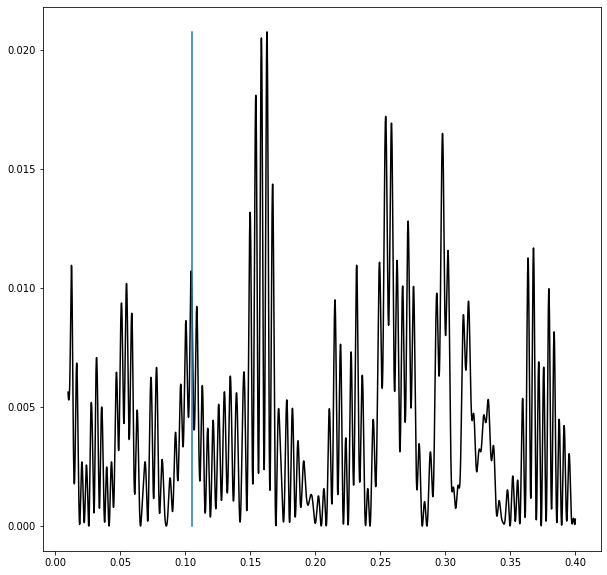

In [30]:


toLombT = np.append(tmpt16,alltmpts)
toLombF = np.append(toplot16,toplot)
freq = np.linspace(0.01,0.4,10000)
powerPl = LombScargle(toLombT,toLombF).power(freq)
plt.figure(figsize=(10,10))
plt.plot(freq,powerPl, c='k')
plt.plot([1/9.52,1/9.52],[0,max(powerPl)])


In [35]:
freq = np.linspace(0.01,1,10000)
maxpeaks = []
for i in range(100):
    sec16toShuffle = sec16
    np.random.shuffle(sec16toShuffle)
    sec23toShuffle = sec23
    np.random.shuffle(sec23toShuffle)
    sec24toShuffle = sec24
    np.random.shuffle(sec24toShuffle)
    sec25toShuffle = sec25
    np.random.shuffle(sec25toShuffle)
    tmp16, tmpt16, error16 = sineFitLevenbergMarquardt(sec16t, sec16toShuffle, 105)
    tmp23, tmpt23, error23 = sineFitLevenbergMarquardt(sec23t, sec23toShuffle, 93)
    tmp24, tmpt24, error24 = sineFitLevenbergMarquardt(sec24t, sec24toShuffle, 100)
    tmp25, tmpt25, error25 = sineFitLevenbergMarquardt(sec25t, sec25toShuffle, 107)
    alltmps = np.append(tmp23, tmp24)
    alltmpts = np.append(tmpt23, tmpt24)
    allerrors = np.append(error23,error24)
    alltmps = np.append(alltmps, tmp25)
    alltmpts = np.append(alltmpts, tmpt25)
    allerrors = np.append(allerrors,error25)
    toplot = 0.08029870*24*60*(np.array(alltmps)-1.5031844728888097)/(2*np.pi)
    toplot16 = 0.08029870*24*60*(np.array(tmp16)-1.5031844728888097)/(2*np.pi)
    toLombT = np.append(tmpt16,alltmpts)
    toLombF = np.append(toplot16,toplot)
    powerPl = LombScargle(toLombT,toLombF).power(freq)
    maxpeaks.append(max(powerPl))

D:\conda\lib\site-packages\scipy\optimize\minpack.py:449: RuntimeWarning: Number of calls to function has reached maxfev = 400.
  warnings.warn(errors[info][0], RuntimeWarning)


In [23]:
freq = np.linspace(0.01,1,10000)
maxpeaks = []
for i in range(10000):
    sec16toShuffle = tmp16
    np.random.shuffle(sec16toShuffle)
    sec23toShuffle = tmp23
    np.random.shuffle(sec23toShuffle)
    sec24toShuffle = tmp24
    np.random.shuffle(sec24toShuffle)
    sec25toShuffle = tmp25
    np.random.shuffle(sec25toShuffle)
    sec26toShuffle = tmp26
    np.random.shuffle(sec26toShuffle)
    alltmps = np.append(sec23toShuffle, sec24toShuffle)
    alltmpts = np.append(tmpt23, tmpt24)
    alltmps = np.append(alltmps, sec25toShuffle)
    alltmpts = np.append(alltmpts, tmpt25)
    alltmps = np.append(alltmps, sec26toShuffle)
    alltmpts = np.append(alltmpts, tmpt26)
    toplot = 0.08029870*24*60*(np.array(alltmps)-1.5031844728888097)/(2*np.pi)
    toplot16 = 0.08029870*24*60*(np.array(tmp16)-1.5031844728888097)/(2*np.pi)
    toLombT = np.append(tmpt16,alltmpts)
    toLombF = np.append(toplot16,toplot)
    powerPl = LombScargle(toLombT,toLombF).power(freq)
    maxpeaks.append(max(powerPl))

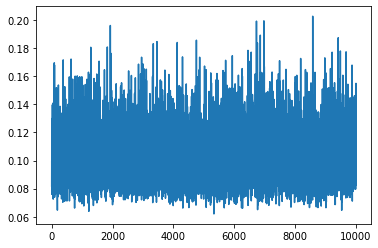

In [24]:
plt.plot(maxpeaks)

In [25]:
idx = (-np.array(maxpeaks)).argsort()[:100]
for el in idx:
    print(maxpeaks[el])

0.20276562135061577
0.19948474769865973
0.1992812202374069
0.1961662439944829
0.18927113135129706
0.18745996006164126
0.18569728744354844
0.18471014408385608
0.18406637235411655
0.1837535512498829
0.1832181114701916
0.18086825006360813
0.18065816188593192
0.17845839112912318
0.1780167948377364
0.17741942220486853
0.17716191035018233
0.1771403298388615
0.17625711818725426
0.1746452213960412
0.17381412457925574
0.17357594817105648
0.1735733780027322
0.17312136117054866
0.1726924988793974
0.17226059652665873
0.17167723247949934
0.1713933692827981
0.17108609018146428
0.17073988080357694
0.17057489512730228
0.1695918576778072
0.16887244032194235
0.16863637940342868
0.16803636985844148
0.16794776782784837
0.1672797923060314
0.16706834387518427
0.1668776013365159
0.165583390964835
0.16549771225326693
0.16548969818511788
0.16538353868722117
0.1650566667799213
0.1649473437463063
0.1647757386426972
0.16463557391500727
0.1646355437053238
0.1644690275121717
0.16439424688918097
0.16408909117314005


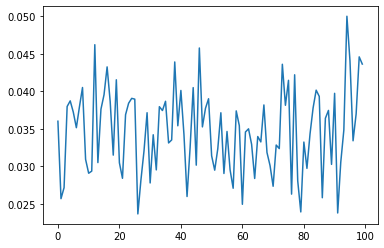

In [36]:
plt.plot(maxpeaks)

In [219]:
semiMajor = (20*20*(7.496*(10**(-6))))**(1/3)
semiMajor = 0.1441993124788079au

0.1441993124788079

In [221]:
5*60*299792458 = 0.6 au

89937737400

In [ ]:
0.67*0.6/0.14 = 2.87 M solar

In [224]:
semiMajor = (1*1*(7.496*(10**(-6))))**(1/3)
semiMajor

0.0195708577046675

In [225]:
massLimit = 0.0009543 * 12

In [226]:
(0.14*massLimit)/0.67 au

0.002392871641791045

In [227]:
np.sqrt((0.016**3)/(7.496*(10**(-6))))

0.739205492317212

In [228]:
0.0009543 * 12*0.016/0.67

0.0002734710447761194

In [229]:
0.0002734710447761194*(1.496*100000000000)/(300000000)

0.1363708943283582

In [231]:
semiMajor = (10*10*(7.496*(10**(-6))))**(1/3)
semiMajor = 0.09083987458620928 au

0.09083987458620928

In [233]:
a_star = 7.6*60*300000000/(1.496*100000000000)
a_star = 0.9144385026737968 au

0.9144385026737968

In [234]:
mp = 0.67*0.91/(0.091)
mp

6.7

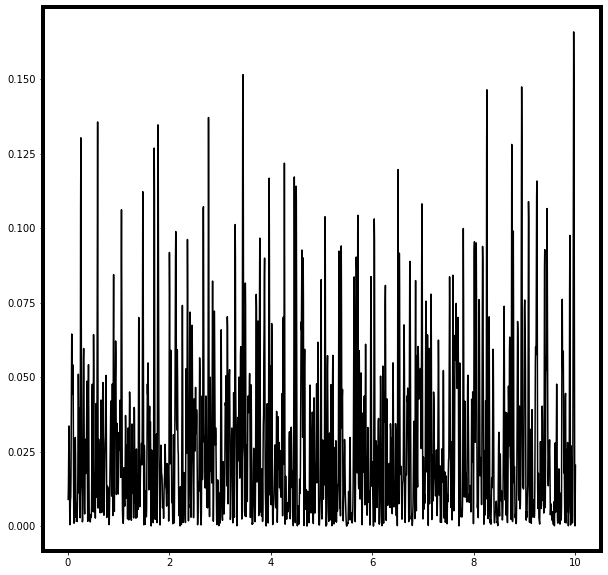

In [174]:

freq = np.linspace(0.01,10,int(10000/5))
powerPl = LombScargle(alltmpts,toplot/np.mean(toplot)).power(freq)
plt.figure(figsize=(10,10))
plt.plot(freq,powerPl, c='k')

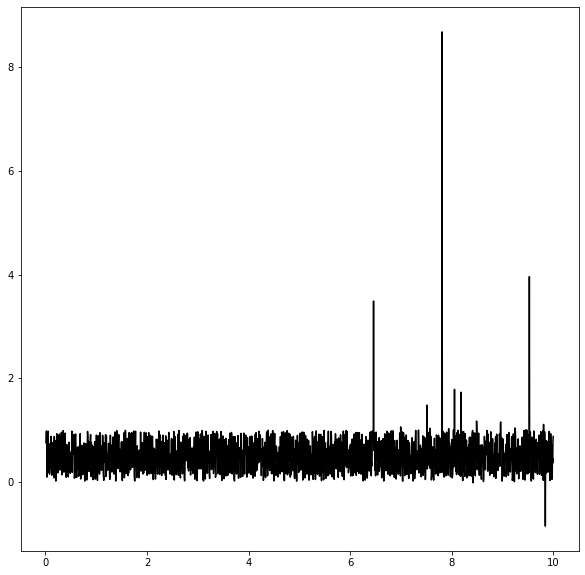

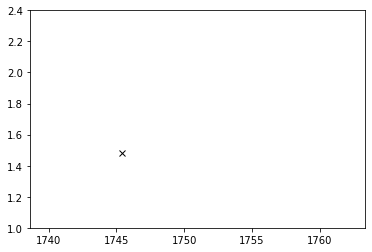

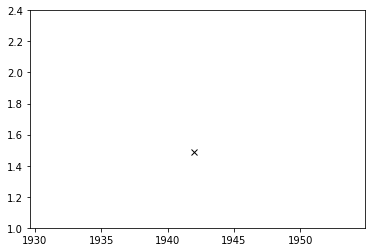

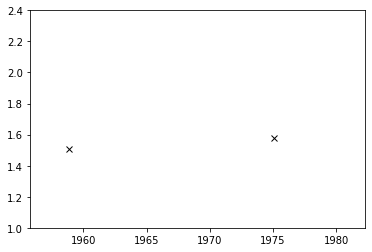

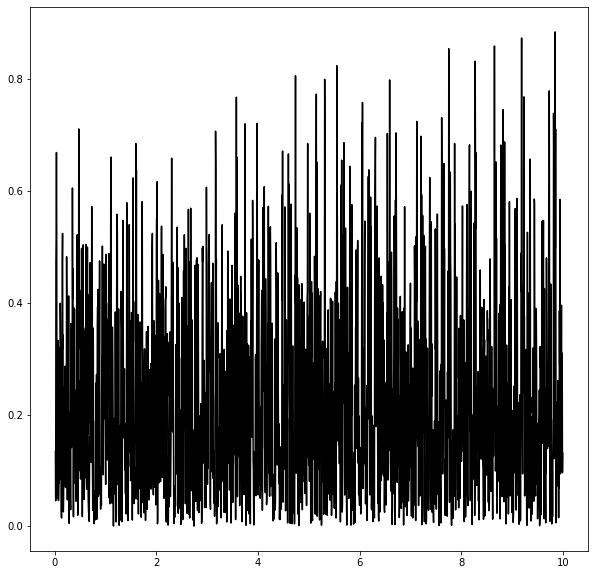

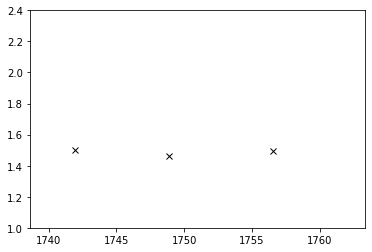

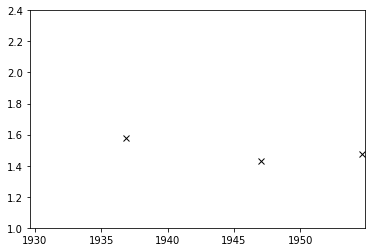

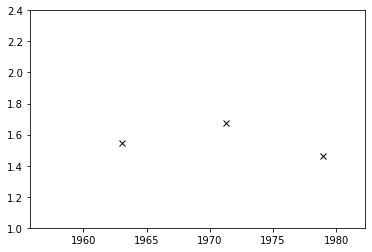

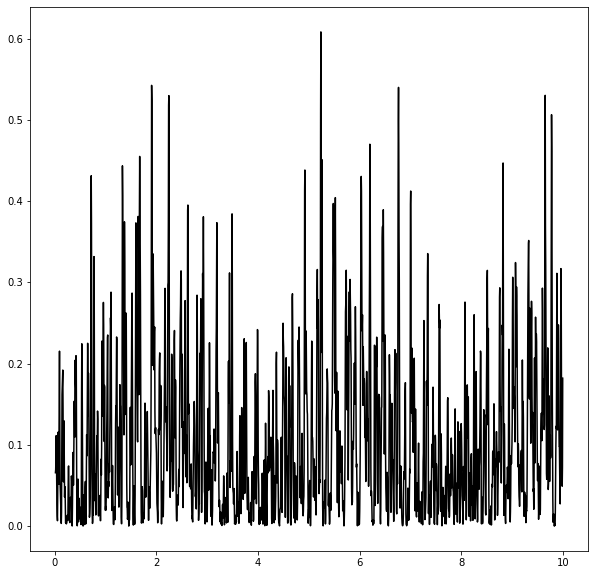

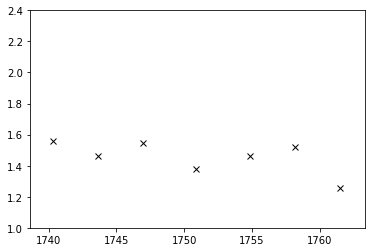

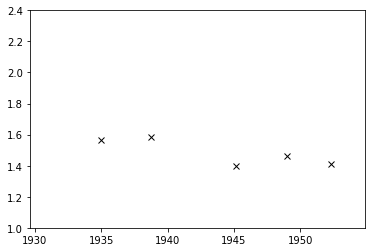

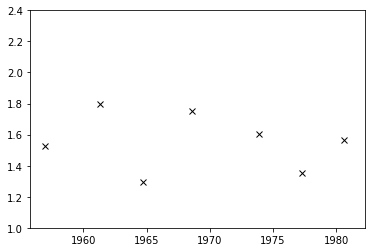

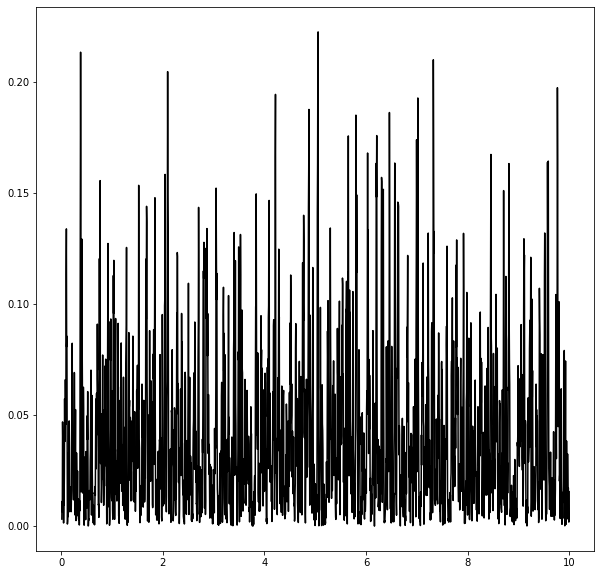

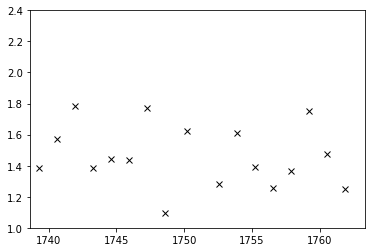

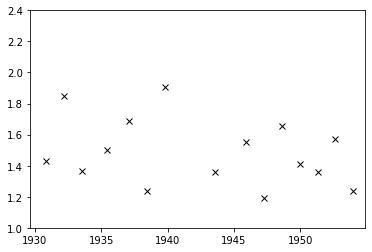

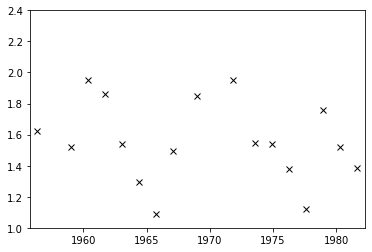

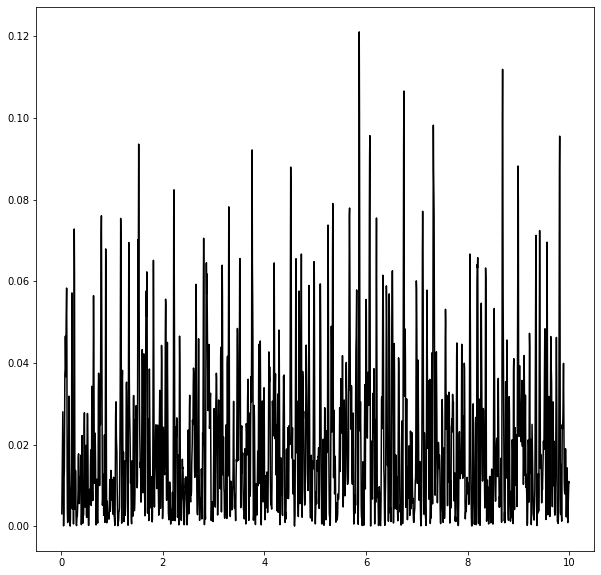

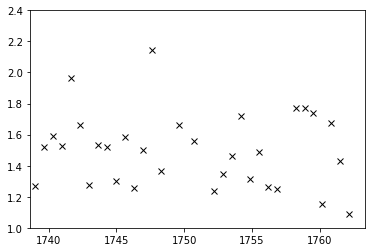

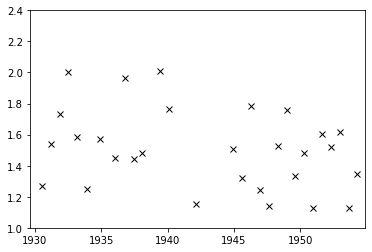

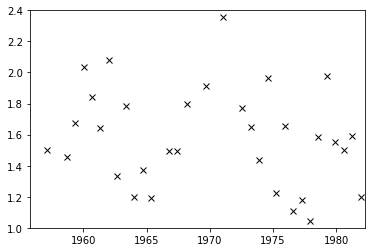

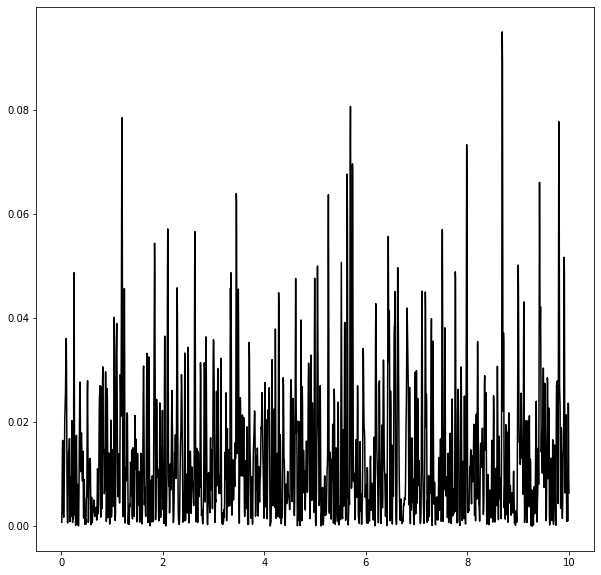

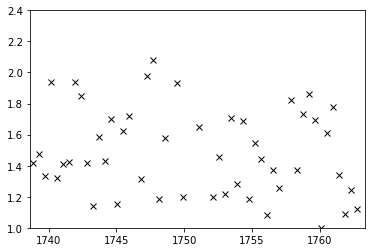

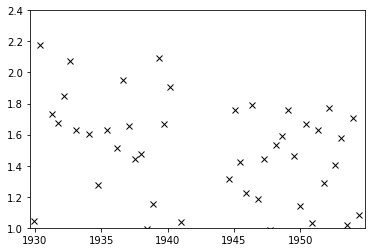

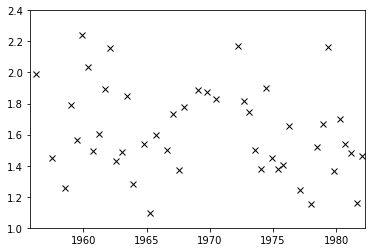

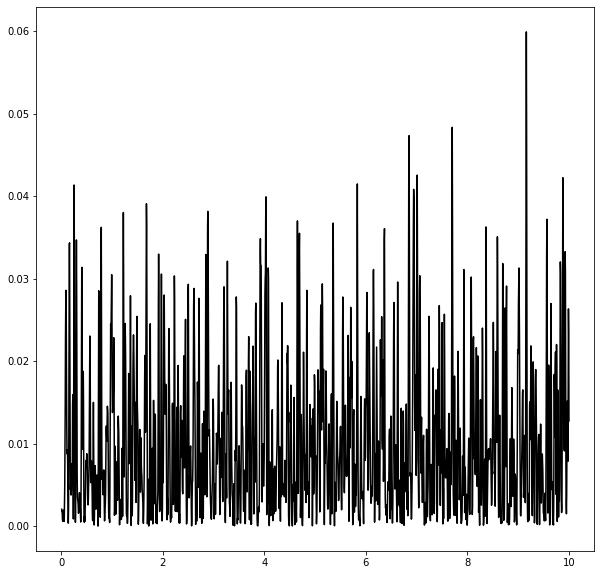

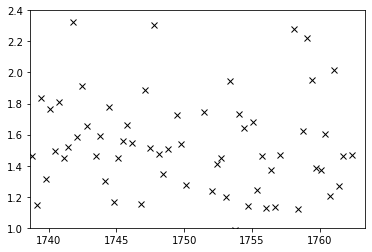

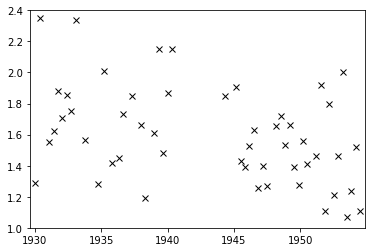

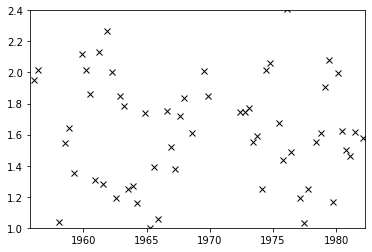

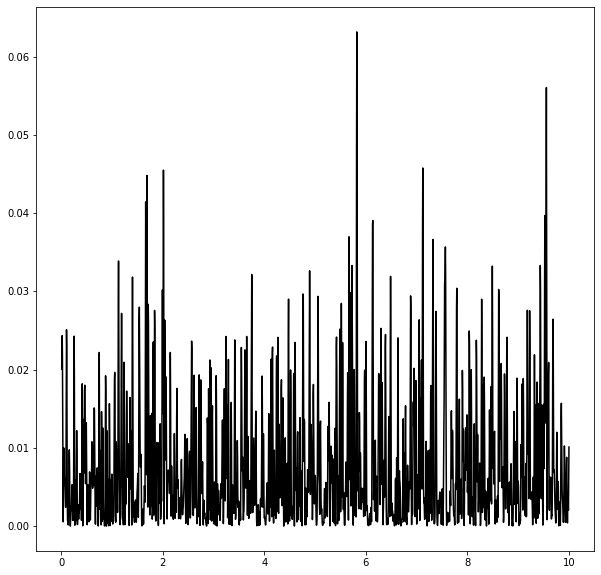

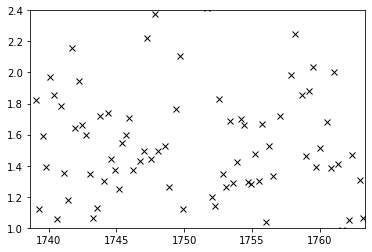

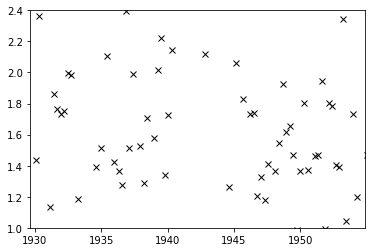

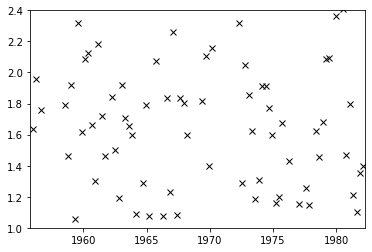

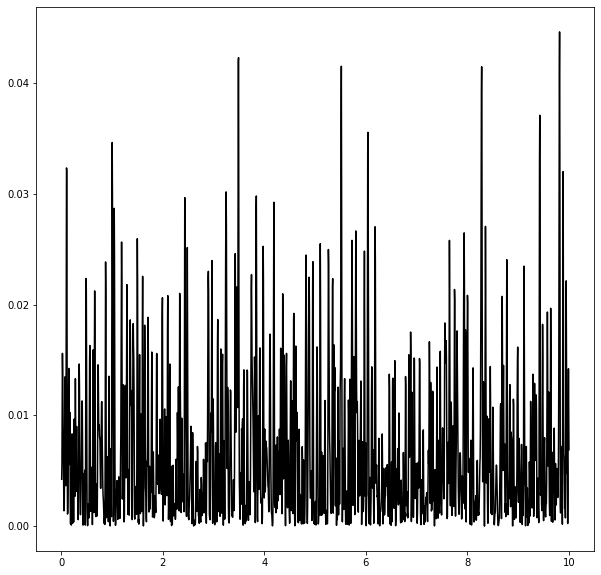

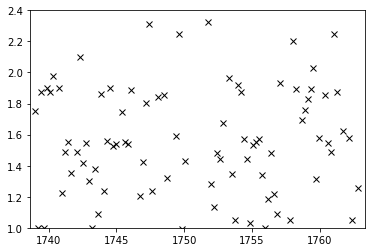

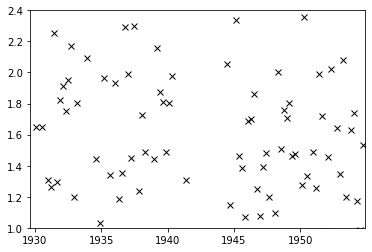

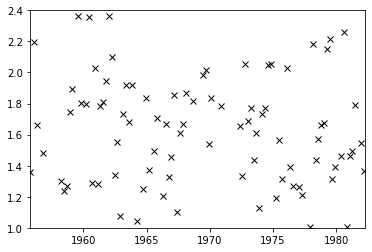

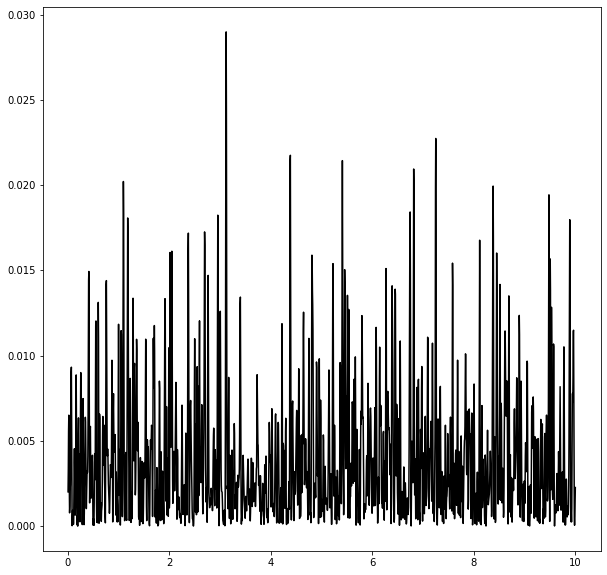

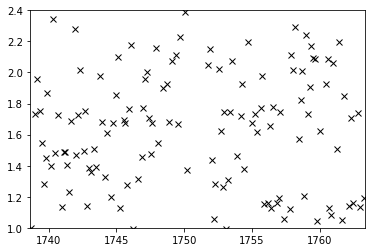

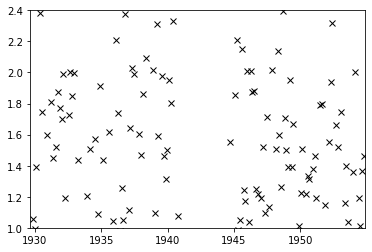

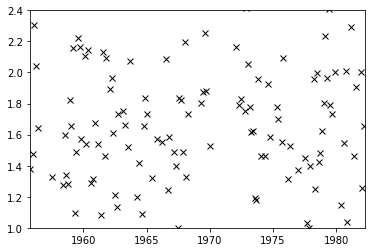

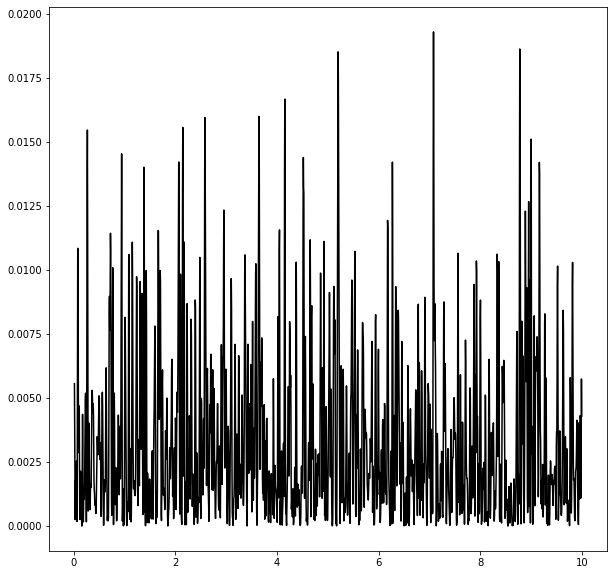

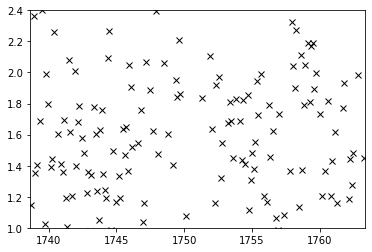

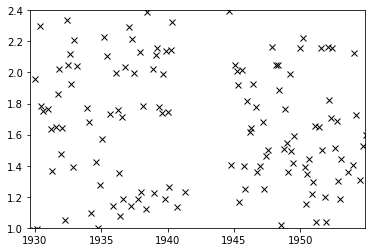

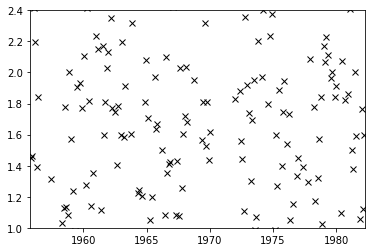

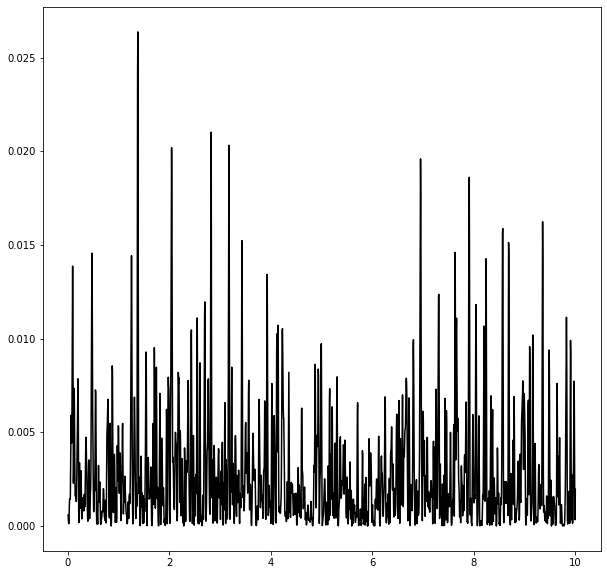

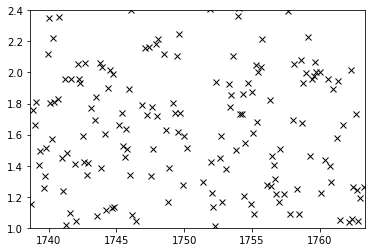

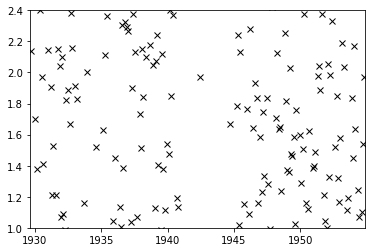

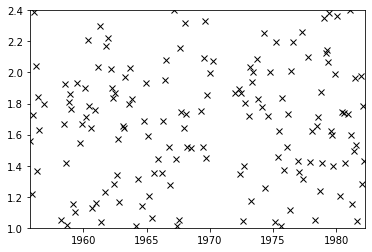

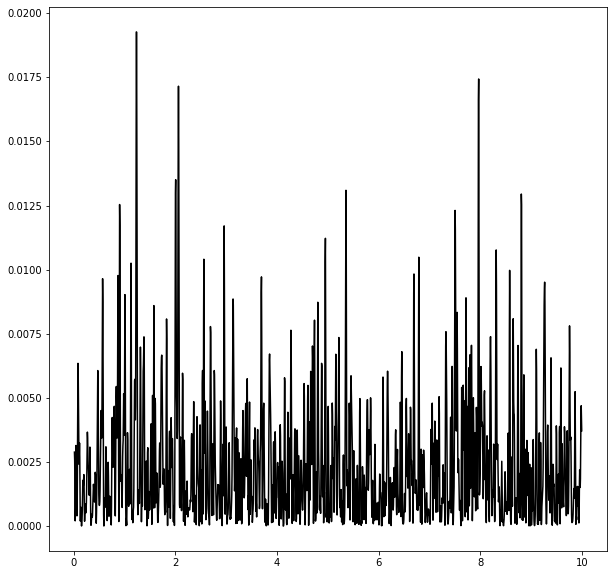

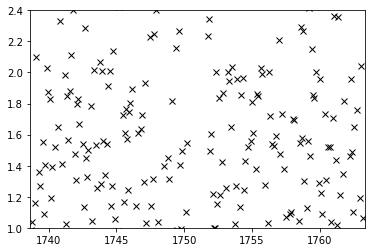

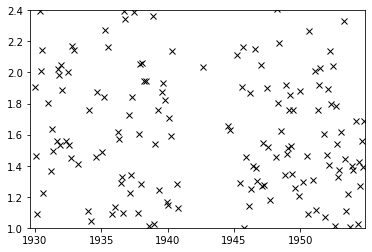

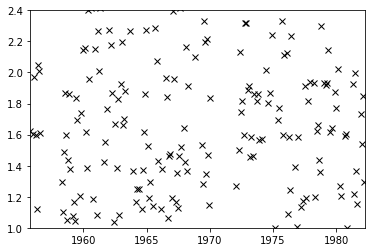

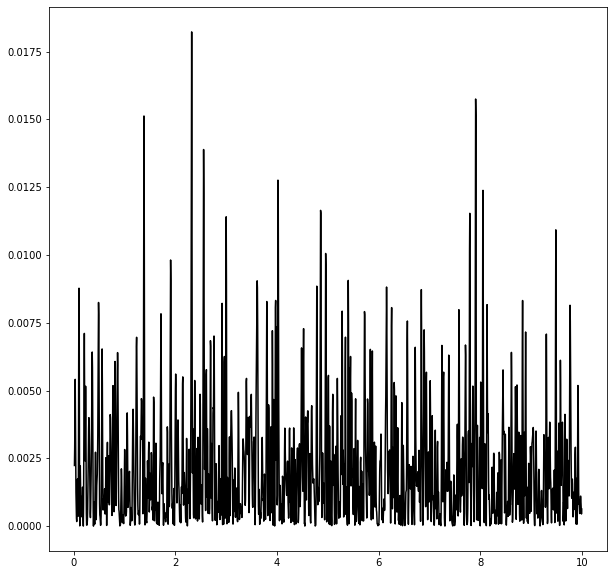

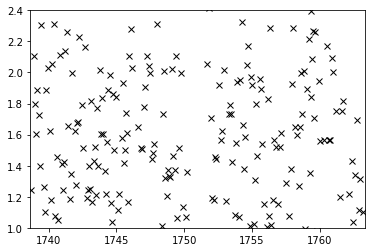

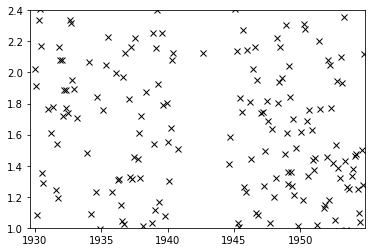

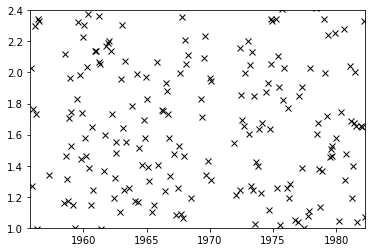

In [7]:
SlicesToTry = [5,10,20,50,100,150,200,250,300,500, 600,700,800,900]
timeAll = np.append(sec16t, sec23t)
timeAll = np.append(timeAll, sec24t)
fluxAll = np.append(sec16, sec23)
freq = np.linspace(0.01,10,int(10000/5))
fluxAll = np.append(fluxAll, sec24)
for el in SlicesToTry:
    
    phases, timeMeans = sineFit(timeAll, fluxAll, el)

    powerPl = LombScargle(timeMeans,phases).power(freq)
    plt.figure(figsize=(10,10))
    plt.plot(freq,powerPl, c='k')
    plt.show()
    plt.xlim(sec16t[0], sec16t[-1])
    plt.ylim(1, 2.4)
    plt.plot(timeMeans,phases, 'kx')
    plt.show()
    plt.xlim(sec23t[0], sec23t[-1])
    plt.ylim(1, 2.4)
    plt.plot(timeMeans,phases, 'kx')
    plt.show()
    plt.xlim(sec24t[0], sec24t[-1])
    plt.ylim(1, 2.4)
    plt.plot(timeMeans,phases, 'kx')
    plt.show()

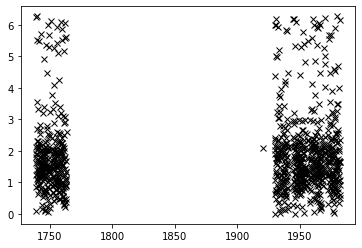

In [26]:
plt.plot(timeMeans,phases, 'kx')

In [60]:
import sys
!conda install --yes --prefix {sys.prefix} waipy

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - waipy

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




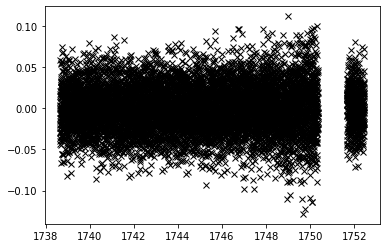

In [25]:
plt.plot(sec16t[:9000], sec16[:9000], 'kx')

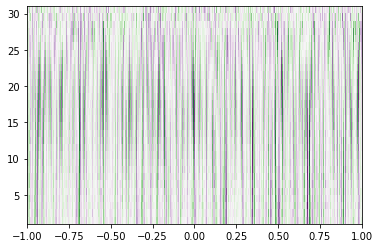

In [35]:
sig = sec16[:8000]
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max()) # doctest:

plt.show() # doctest: +SKIP

In [66]:
import sys
!{sys.executable} -m pip install pycwt

  Created wheel for pycwt: filename=pycwt-0.3.0a22-py3-none-any.whl size=17811 sha256=191b153832acaa60e8f4fda3d586a9b5c985c11d5f5522de9c0c4f6643174ea5
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\53\99\6b\a43c99414482c20862ca8917862237de8bd27ee795a55faa6c
Successfully built pycwt


In [67]:
from __future__ import division
import numpy
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find

In [69]:
dat = sec16[:8000]
dt = 2/60/24

2.0

In [72]:
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

In [74]:
std = np.std(dat)
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

In [75]:
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

In [77]:
N = len(dat)
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

In [79]:
var = std**2
glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

In [81]:
sel = find((period >= 2) & (period < 8))
Cdelta = mother.cdelta
scale_avg = (scales * numpy.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)


D:\conda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\conda\lib\site-packages\ipykernel_launcher.py:24: UserWarning: No contour levels were found within the data range.


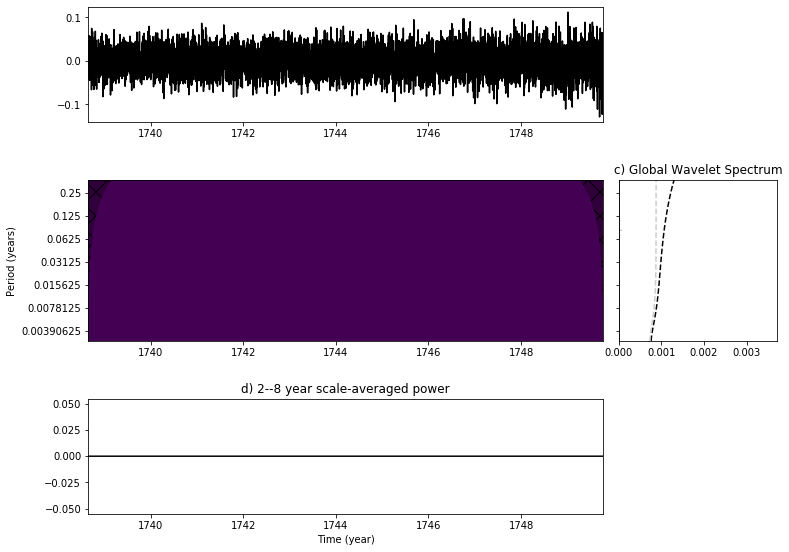

In [89]:
t = sec16t[:8000]
# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = pyplot.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)


# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
#bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (years)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, numpy.log2(period), 'k--')
cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
#cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
#dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} year scale-averaged power'.format(2, 8))
dx.set_xlabel('Time (year)')
#dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])

pyplot.show()

In [38]:
alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1]
alpha

0.04517402288404684

In [63]:
import pylab

In [65]:
import kPyWavelet

ModuleNotFoundError: No module named 'wav'

In [56]:
sec16mean = np.array_split(np.array(sec16t),100)
sec16meanA = []
for i in range(len(sec16mean)):
    toadd = np.mean(sec16mean[i])
    sec16meanA.append(toadd)

sec23mean = np.array_split(np.array(sec23t),100)
sec23meanA = []
for i in range(len(sec23mean)):
    toadd = np.mean(sec23mean[i])
    sec23meanA.append(toadd)
    
sec24mean = np.array_split(np.array(sec24t),100)
sec24meanA = []
for i in range(len(sec24mean)):
    toadd = np.mean(sec24mean[i])
    sec24meanA.append(toadd)



timeAll =np.append(sec16meanA,sec23meanA)
timeAll = np.append(timeAll, sec24meanA)




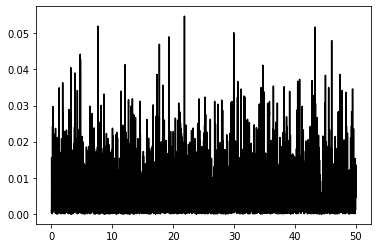

In [58]:
plt.plot(freq,powerPl, c='k')